
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

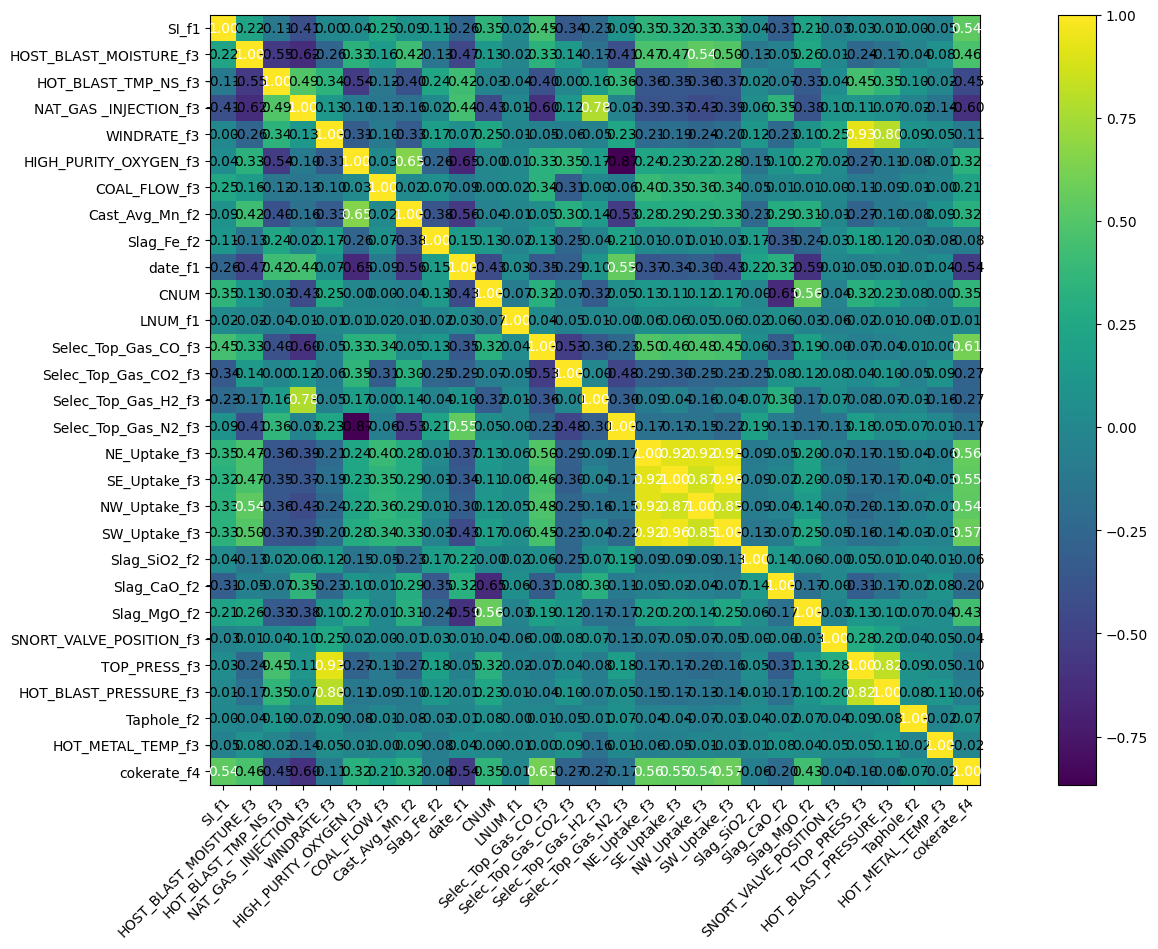

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

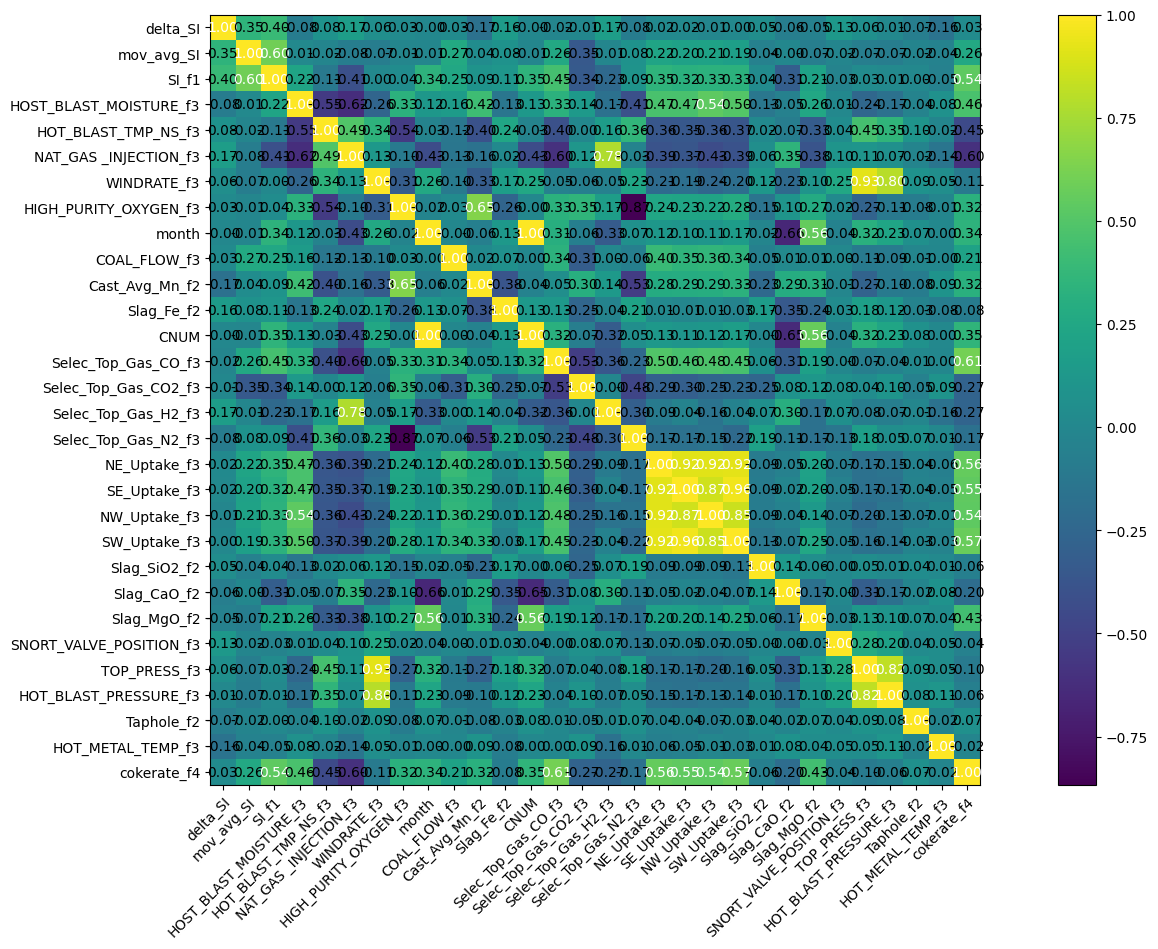

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        ## [B, 10, 35],  [B, 10, 1]
        ## idx_pred,     pred_si 
        
       
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## print(pred_si.shape)
        ## print(y_si.shape)
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 0.7
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.552495
Loss_SI: 0.38657164573669434 Loss_all: 0.9396496415138245
===
[200] Train Loss: 0.094681
Loss_SI: 0.037221696227788925 Loss_all: 0.22875313460826874
===
[400] Train Loss: 0.036957
Loss_SI: 0.015531430952250957 Loss_all: 0.08695042133331299
===
[600] Train Loss: 0.027177
Loss_SI: 0.01503810379654169 Loss_all: 0.05550169572234154
===
[800] Train Loss: 0.019328
Loss_SI: 0.008895134553313255 Loss_all: 0.04367145523428917
===


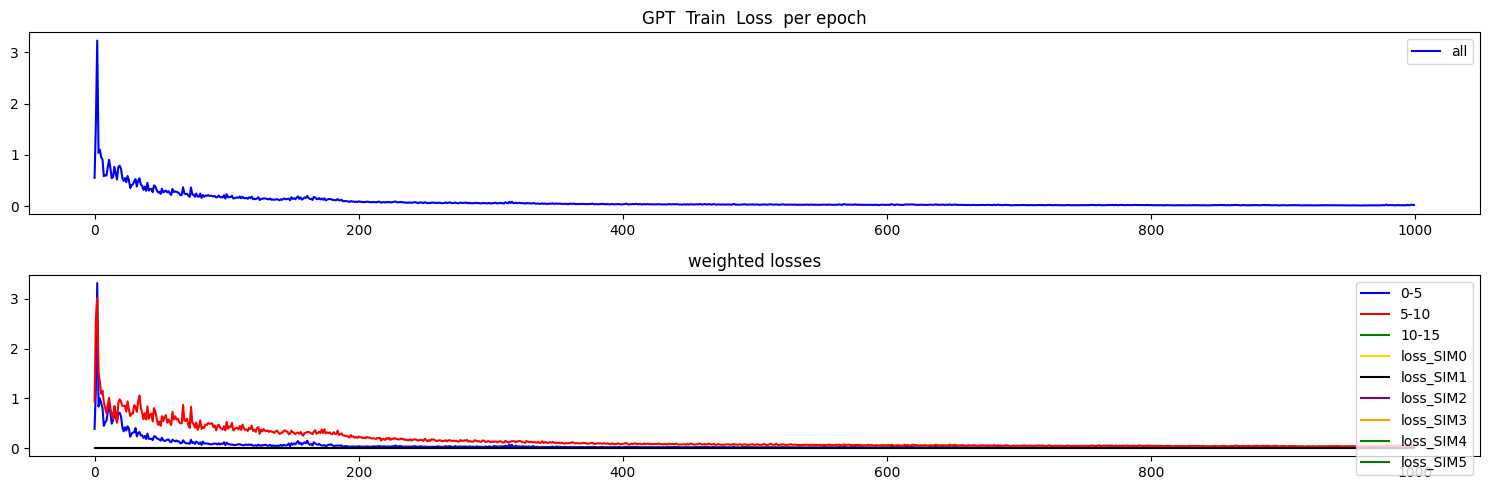

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


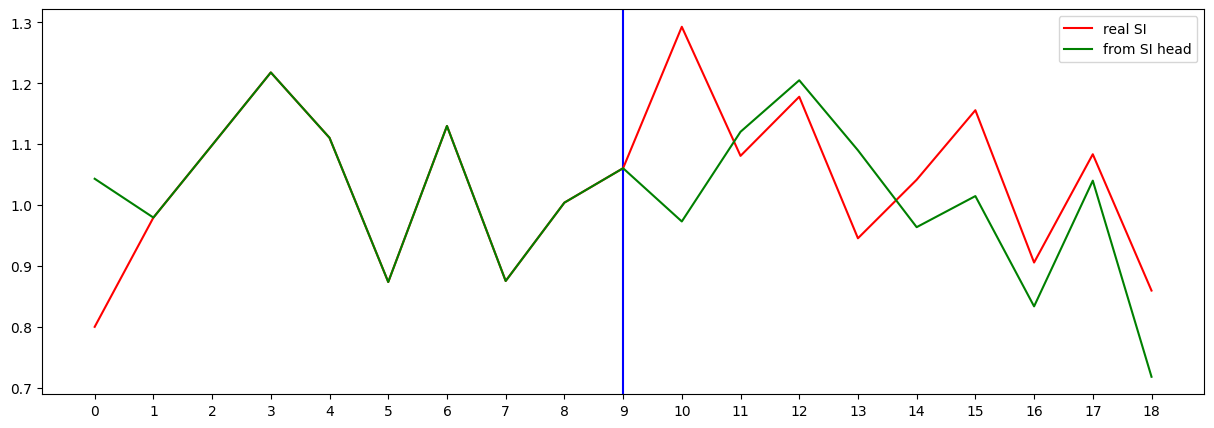

Testing R**2 - (all) - (no inputs):  0.9826083111216556
Testing R**2 - (f2) - SI full (no inputs):  -1.0978191471900067
Testing R**2 - SI head only (no inputs):  -0.6504577713776514
0 ...index R**2 (no inputs):  -2.017260734247101
1 ...index R**2 (no inputs):  -0.6168111280193633
2 ...index R**2 (no inputs):  -1.0978191471900067
3 ...index R**2 (no inputs):  -0.0982113983053734
4 ...index R**2 (no inputs):  -3.7176497043647068
5 ...index R**2 (no inputs):  -2.353857916841651
6 ...index R**2 (no inputs):  -0.46848907879439117
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.8596302647322775
10 ...index R**2 (no inputs):  -0.5171643993408142
11 ...index R**2 (no inputs):  -25.935838911730173
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.9916041094528718
16 ...index R**2 (no inputs):  -2.587675958486301
17 ...index R**2 (no inputs):  -28.39582716

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.753221
Loss_SI: 0.6127851605415344 Loss_all: 1.0809041261672974
===
[200] Train Loss: 0.160388
Loss_SI: 0.09702733159065247 Loss_all: 0.3082311451435089
===
[400] Train Loss: 0.098760
Loss_SI: 0.059679627418518066 Loss_all: 0.1899474859237671
===
[600] Train Loss: 0.059905
Loss_SI: 0.029603492468595505 Loss_all: 0.1306098997592926
===
[800] Train Loss: 0.040834
Loss_SI: 0.020481552928686142 Loss_all: 0.0883234366774559
===


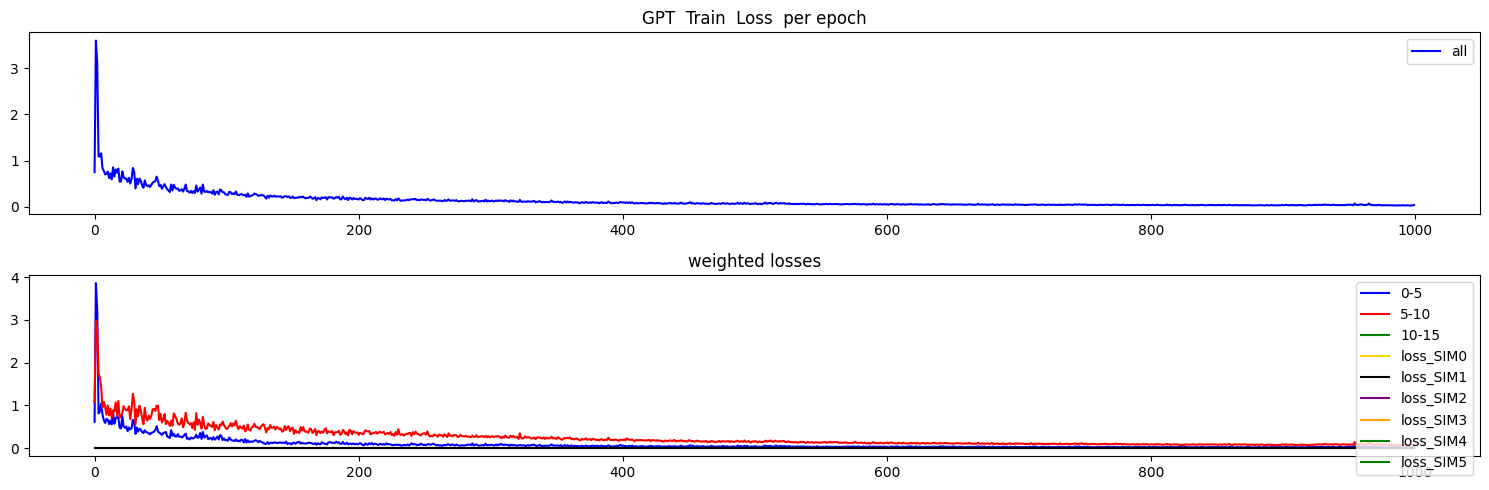

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


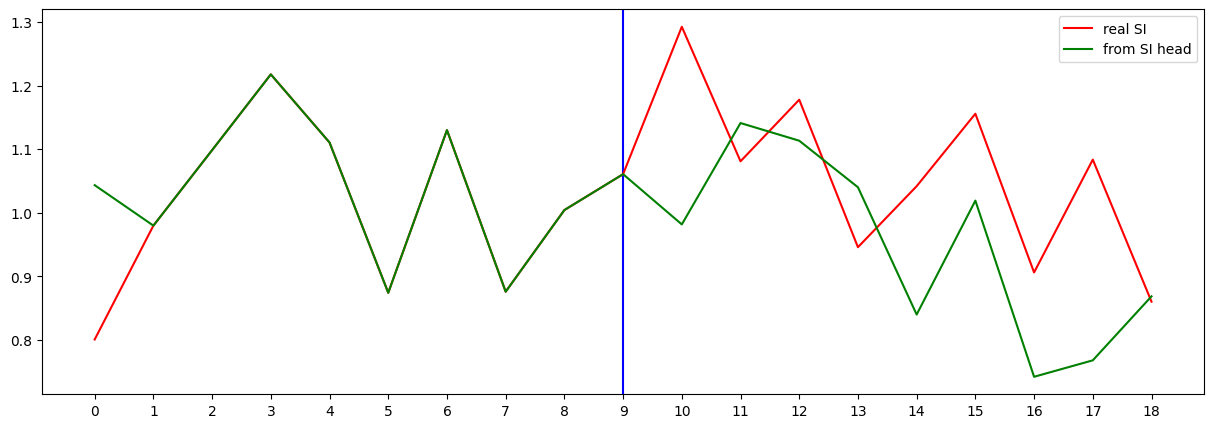

Testing R**2 - (all) - (no inputs):  0.9741354367774946
Testing R**2 - (f2) - SI full (no inputs):  -1.3206329027862953
Testing R**2 - SI head only (no inputs):  -0.9844733478696011
0 ...index R**2 (no inputs):  -1.4029136116139864
1 ...index R**2 (no inputs):  -1.4914345989454034
2 ...index R**2 (no inputs):  -1.3206329027862953
3 ...index R**2 (no inputs):  -0.17540213182513753
4 ...index R**2 (no inputs):  -1.8446809583847972
5 ...index R**2 (no inputs):  -4.299246465192985
6 ...index R**2 (no inputs):  -0.7627103012232919
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.6420490747752305
10 ...index R**2 (no inputs):  -1.6638140265653583
11 ...index R**2 (no inputs):  -16.13976730321365
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.993631527588775
16 ...index R**2 (no inputs):  -2.891467255809608
17 ...index R**2 (no inputs):  -15.914373062

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.929190
Loss_SI: 0.81273353099823 Loss_all: 1.200923204421997
===
[200] Train Loss: 0.236696
Loss_SI: 0.15211443603038788 Loss_all: 0.43405428528785706
===
[400] Train Loss: 0.134388
Loss_SI: 0.07108310610055923 Loss_all: 0.2821005582809448
===
[600] Train Loss: 0.085077
Loss_SI: 0.04188160598278046 Loss_all: 0.18586669862270355
===
[800] Train Loss: 0.056633
Loss_SI: 0.02593734674155712 Loss_all: 0.12825562059879303
===


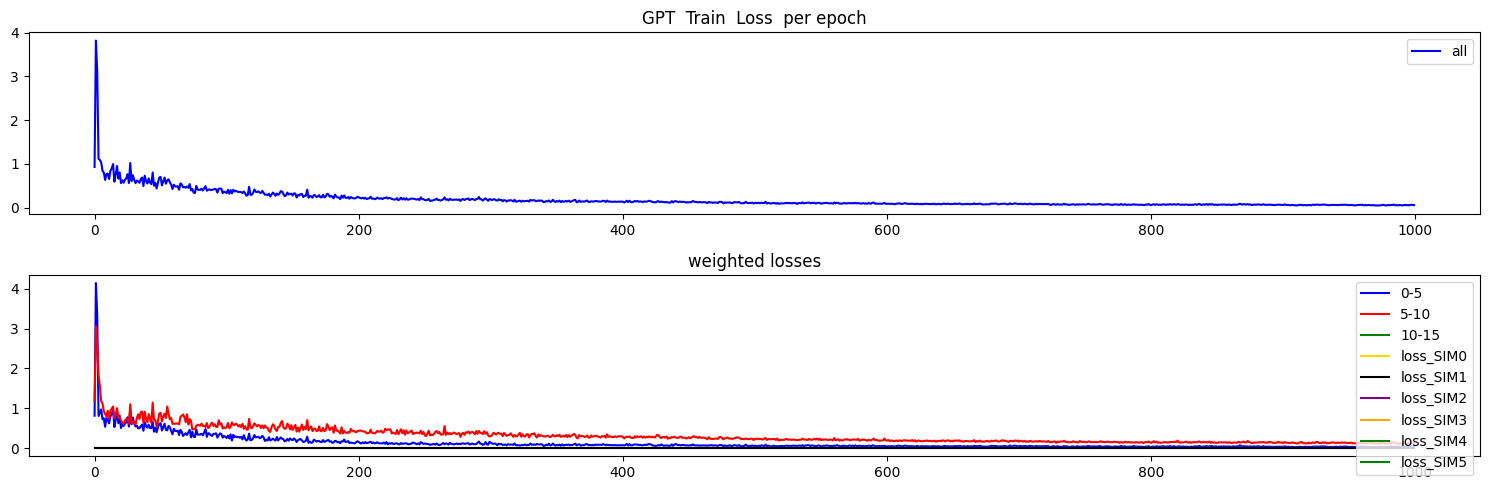

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


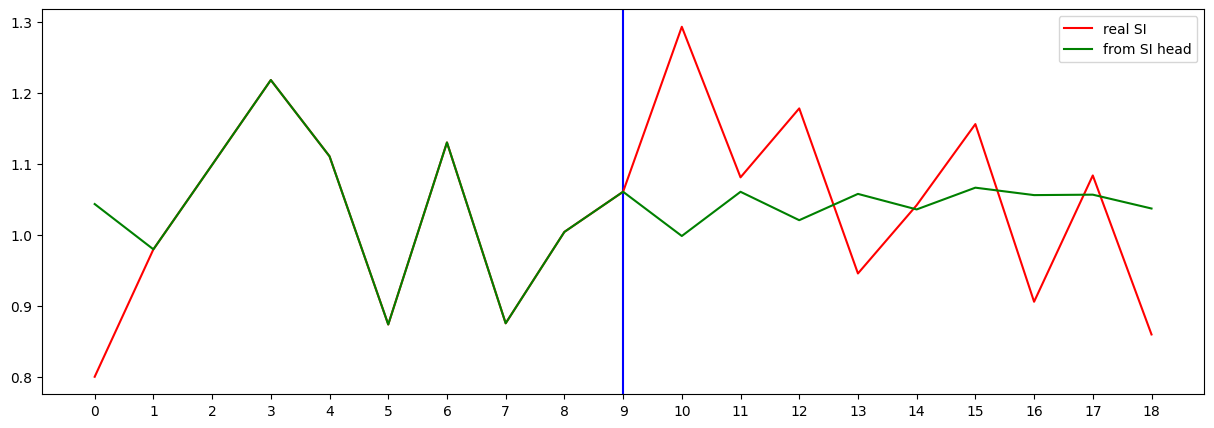

Testing R**2 - (all) - (no inputs):  0.9872354090975329
Testing R**2 - (f2) - SI full (no inputs):  -0.39344967843233314
Testing R**2 - SI head only (no inputs):  -0.13980634754859578
0 ...index R**2 (no inputs):  -0.09275105842756126
1 ...index R**2 (no inputs):  -0.6584772713137623
2 ...index R**2 (no inputs):  -0.39344967843233314
3 ...index R**2 (no inputs):  0.29509913846414004
4 ...index R**2 (no inputs):  -3.1632587691265384
5 ...index R**2 (no inputs):  -1.6301770339537645
6 ...index R**2 (no inputs):  0.08966121708312225
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.3487131709361613
10 ...index R**2 (no inputs):  -0.93439516679953
11 ...index R**2 (no inputs):  -3.1131333256228766
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.134189436867699
16 ...index R**2 (no inputs):  -2.8444463216666125
17 ...index R**2 (no inputs):  -9.538912

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.613557
Loss_SI: 0.4569084644317627 Loss_all: 0.9790711998939514
===
[200] Train Loss: 0.341127
Loss_SI: 0.2426672875881195 Loss_all: 0.5708650350570679
===
[400] Train Loss: 0.207635
Loss_SI: 0.12073753774166107 Loss_all: 0.41039562225341797
===
[600] Train Loss: 0.149583
Loss_SI: 0.08301183581352234 Loss_all: 0.30491676926612854
===
[800] Train Loss: 0.148057
Loss_SI: 0.07325325906276703 Loss_all: 0.32259997725486755
===


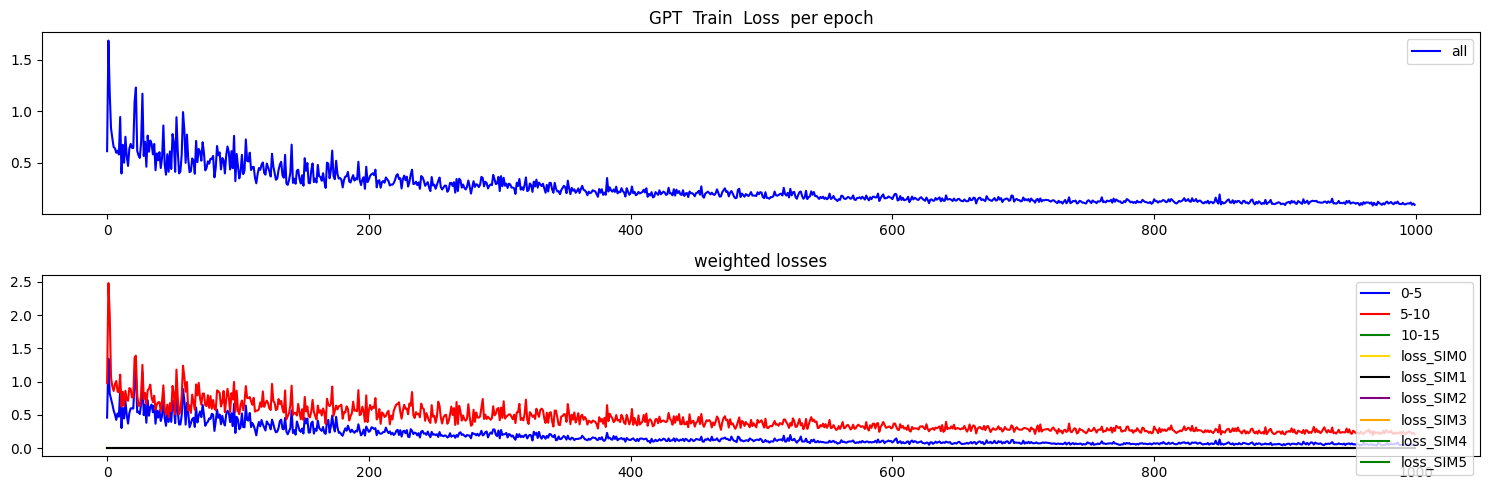

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


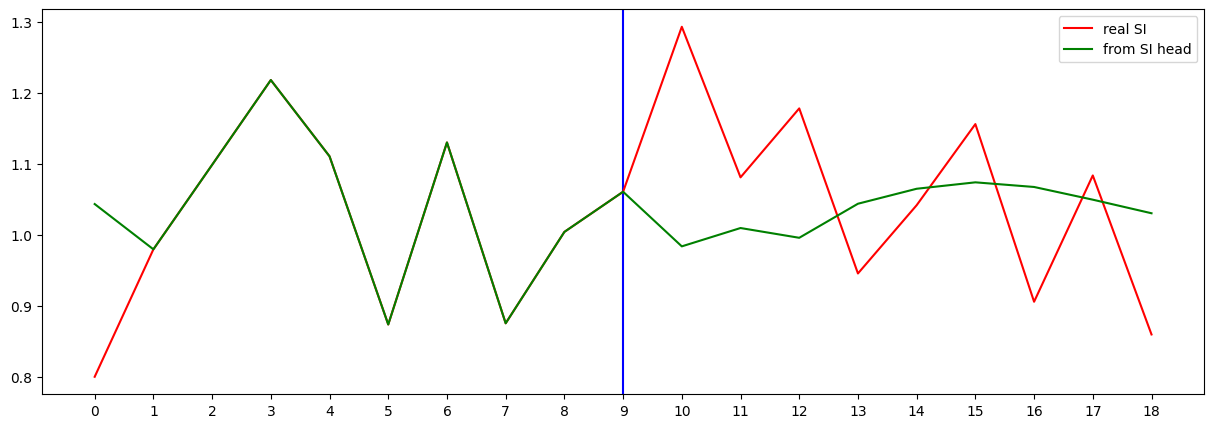

Testing R**2 - (all) - (no inputs):  0.9826949613514532
Testing R**2 - (f2) - SI full (no inputs):  -0.6004628771390108
Testing R**2 - SI head only (no inputs):  -0.16664093398042445
0 ...index R**2 (no inputs):  0.13923261454022107
1 ...index R**2 (no inputs):  -0.10902573180479092
2 ...index R**2 (no inputs):  -0.6004628771390108
3 ...index R**2 (no inputs):  -0.0025820284882354105
4 ...index R**2 (no inputs):  -6.0304517590994
5 ...index R**2 (no inputs):  -2.56710115808367
6 ...index R**2 (no inputs):  -2.6206444406044023
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.6163216388312756
10 ...index R**2 (no inputs):  -0.3974536448864596
11 ...index R**2 (no inputs):  -24.01269866376169
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.08627049092716477
16 ...index R**2 (no inputs):  -3.0485296768850416
17 ...index R**2 (no inputs):  -14.270341

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.903498
Loss_SI: 0.7809261083602905 Loss_all: 1.189499855041504
===
[200] Train Loss: 0.091464
Loss_SI: 0.04469898343086243 Loss_all: 0.20058125257492065
===
[400] Train Loss: 0.043243
Loss_SI: 0.027410421520471573 Loss_all: 0.0801859200000763
===
[600] Train Loss: 0.028296
Loss_SI: 0.014712873846292496 Loss_all: 0.05998987331986427
===
[800] Train Loss: 0.017711
Loss_SI: 0.00798637606203556 Loss_all: 0.040400661528110504
===


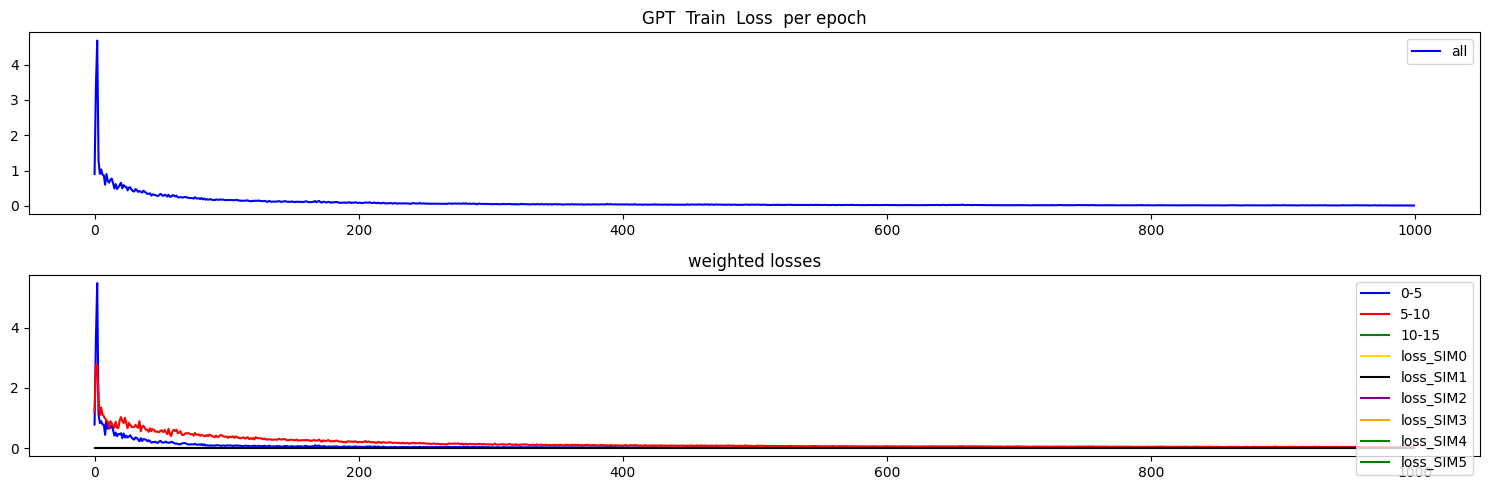

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


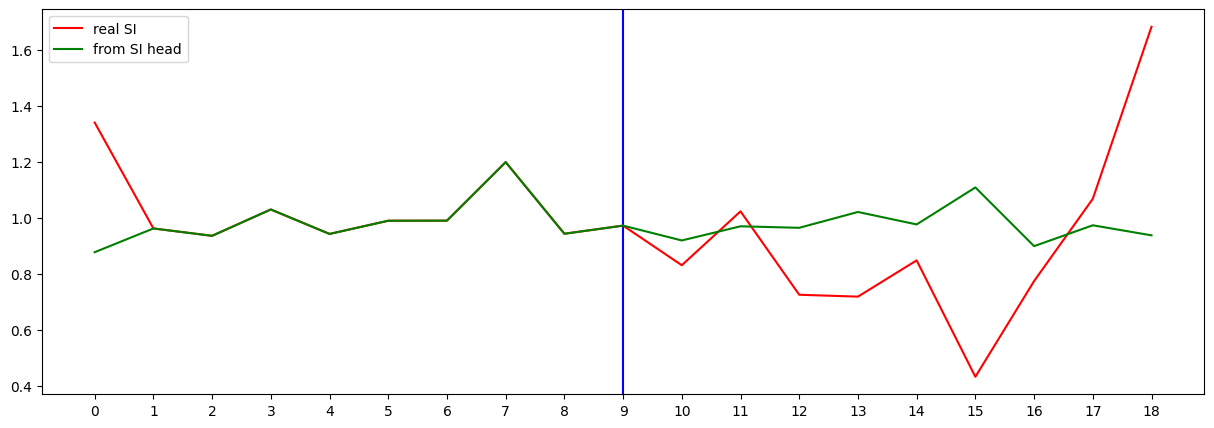

Testing R**2 - (all) - (no inputs):  0.9849634942471466
Testing R**2 - (f2) - SI full (no inputs):  -0.20415082391008577
Testing R**2 - SI head only (no inputs):  -0.12620376039899406
0 ...index R**2 (no inputs):  -0.07329786798783511
1 ...index R**2 (no inputs):  -0.17977131485350584
2 ...index R**2 (no inputs):  -0.20415082391008577
3 ...index R**2 (no inputs):  -0.35685456590949705
4 ...index R**2 (no inputs):  -0.04136053823228725
5 ...index R**2 (no inputs):  -0.4984877131562646
6 ...index R**2 (no inputs):  -0.30892781883100984
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5749135144552542
10 ...index R**2 (no inputs):  -0.778440280654273
11 ...index R**2 (no inputs):  -2.3083356739518526
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.43232436178256894
16 ...index R**2 (no inputs):  -1.5616524813526484
17 ...index R**2 (no inputs):  -5

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.765371
Loss_SI: 0.6241089701652527 Loss_all: 1.0949819087982178
===
[200] Train Loss: 0.177722
Loss_SI: 0.0895228311419487 Loss_all: 0.38351988792419434
===
[400] Train Loss: 0.088597
Loss_SI: 0.04302318021655083 Loss_all: 0.19493725895881653
===
[600] Train Loss: 0.053263
Loss_SI: 0.026552684605121613 Loss_all: 0.11558638513088226
===
[800] Train Loss: 0.042711
Loss_SI: 0.020158477127552032 Loss_all: 0.09533422440290451
===


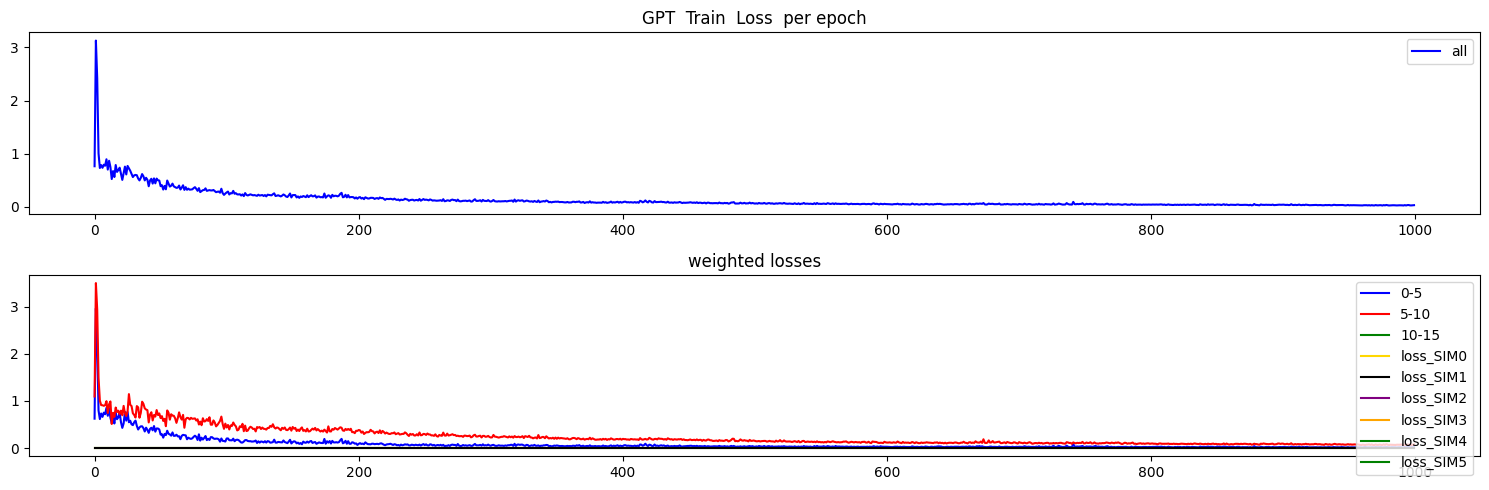

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


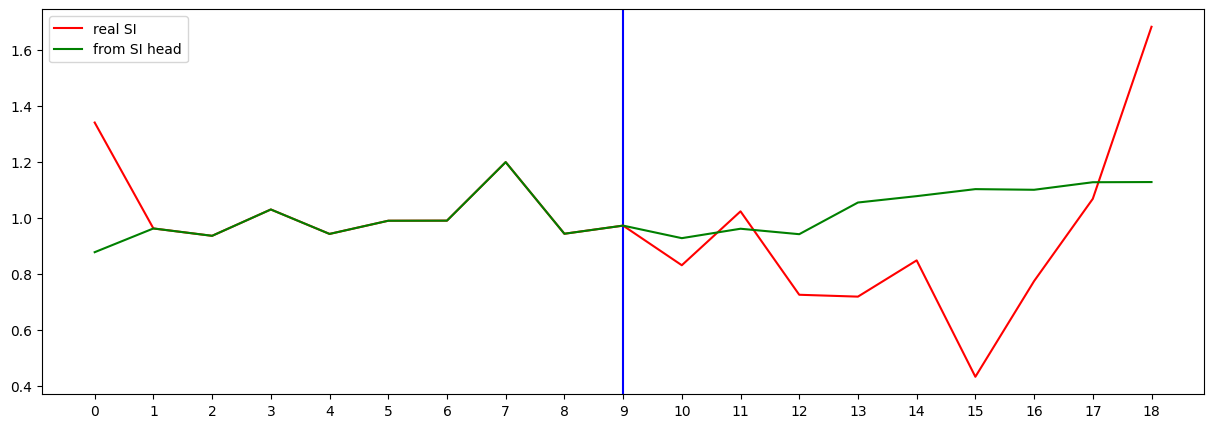

Testing R**2 - (all) - (no inputs):  0.9893439136584365
Testing R**2 - (f2) - SI full (no inputs):  0.08558535829050762
Testing R**2 - SI head only (no inputs):  0.0759623611230762
0 ...index R**2 (no inputs):  -0.05072680196919532
1 ...index R**2 (no inputs):  0.08450935940298354
2 ...index R**2 (no inputs):  0.08558535829050762
3 ...index R**2 (no inputs):  -0.7554267250960911
4 ...index R**2 (no inputs):  -0.15142030957730945
5 ...index R**2 (no inputs):  -0.05795537291474795
6 ...index R**2 (no inputs):  -0.3009378839222332
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.73916670929563
10 ...index R**2 (no inputs):  -0.31523292474774633
11 ...index R**2 (no inputs):  -25.32917646480413
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5102844283195112
16 ...index R**2 (no inputs):  -0.34059509105432695
17 ...index R**2 (no inputs):  -50.46201

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.777516
Loss_SI: 0.699849009513855 Loss_all: 0.9587388038635254
===
[200] Train Loss: 0.241947
Loss_SI: 0.1183597594499588 Loss_all: 0.5303162932395935
===
[400] Train Loss: 0.126933
Loss_SI: 0.05721027031540871 Loss_all: 0.2896207571029663
===
[600] Train Loss: 0.106178
Loss_SI: 0.07082018256187439 Loss_all: 0.18867911398410797
===
[800] Train Loss: 0.063565
Loss_SI: 0.029507357627153397 Loss_all: 0.14303360879421234
===


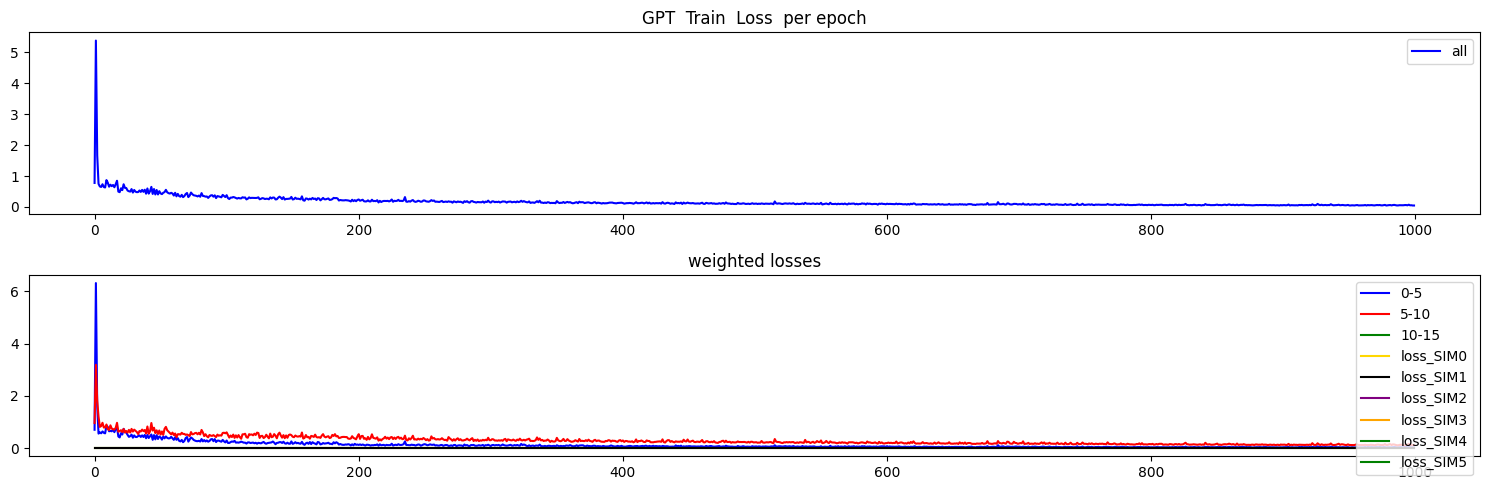

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


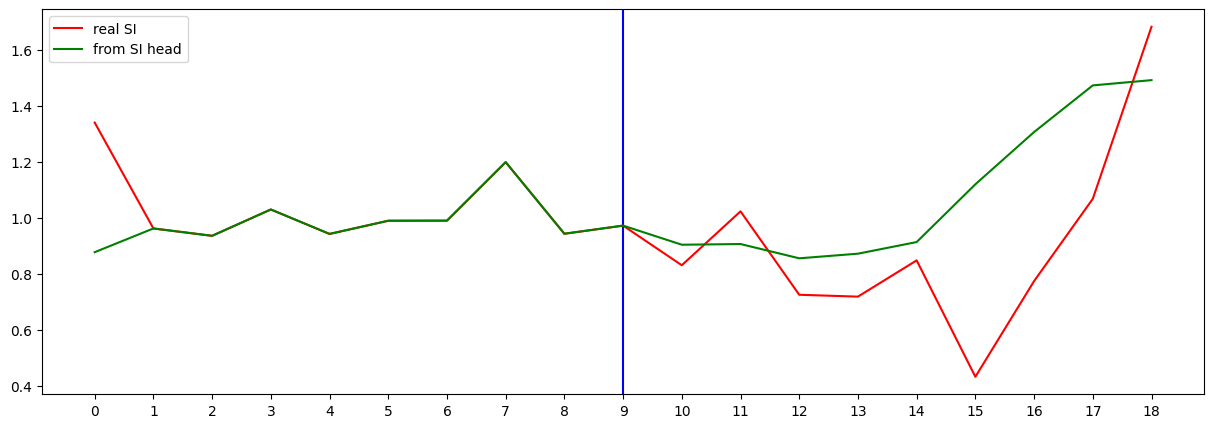

Testing R**2 - (all) - (no inputs):  0.9970489942124939
Testing R**2 - (f2) - SI full (no inputs):  0.33604474205932733
Testing R**2 - SI head only (no inputs):  0.5173673115146986
0 ...index R**2 (no inputs):  0.14930781847554386
1 ...index R**2 (no inputs):  0.4717175281721099
2 ...index R**2 (no inputs):  0.33604474205932733
3 ...index R**2 (no inputs):  -0.4414090494725671
4 ...index R**2 (no inputs):  0.28015324691514565
5 ...index R**2 (no inputs):  0.7192854041170935
6 ...index R**2 (no inputs):  -0.08469136661152832
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.19247500934312556
10 ...index R**2 (no inputs):  0.13188002512702768
11 ...index R**2 (no inputs):  -33.78830003530659
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5222774003694781
16 ...index R**2 (no inputs):  -0.11689513726153411
17 ...index R**2 (no inputs):  -815.234048

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.796258
Loss_SI: 0.5940190553665161 Loss_all: 1.2681503295898438
===
[200] Train Loss: 0.304169
Loss_SI: 0.2527167499065399 Loss_all: 0.4242230951786041
===
[400] Train Loss: 0.162729
Loss_SI: 0.09761818498373032 Loss_all: 0.3146531283855438
===
[600] Train Loss: 0.134086
Loss_SI: 0.07005318999290466 Loss_all: 0.2834944427013397
===
[800] Train Loss: 0.099466
Loss_SI: 0.0529976561665535 Loss_all: 0.20789258182048798
===


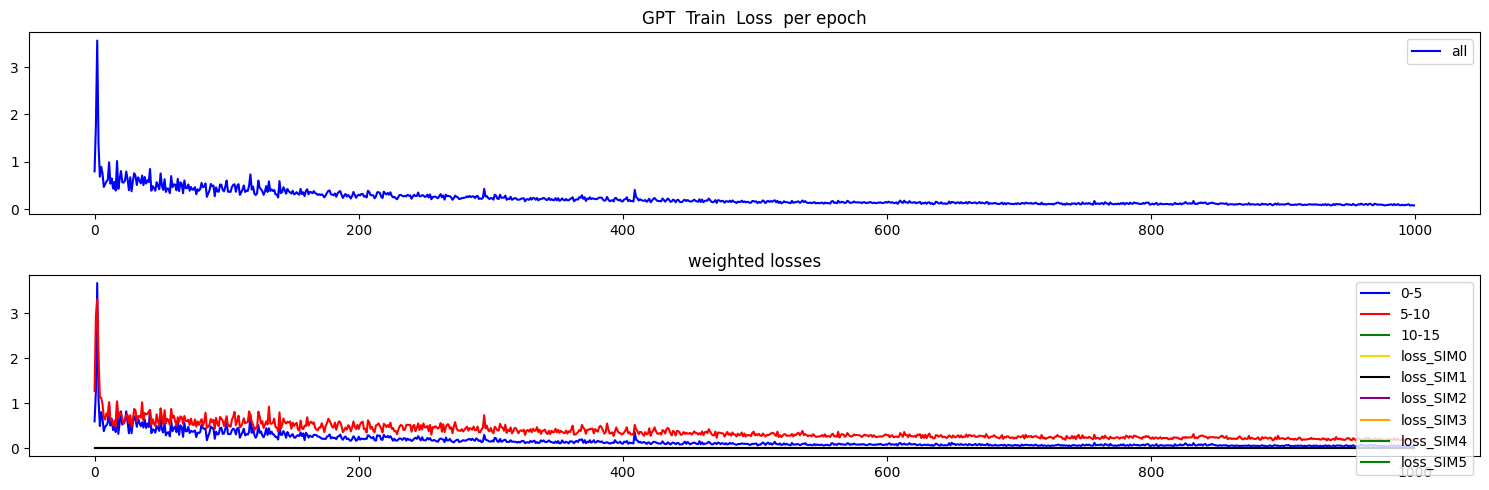

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


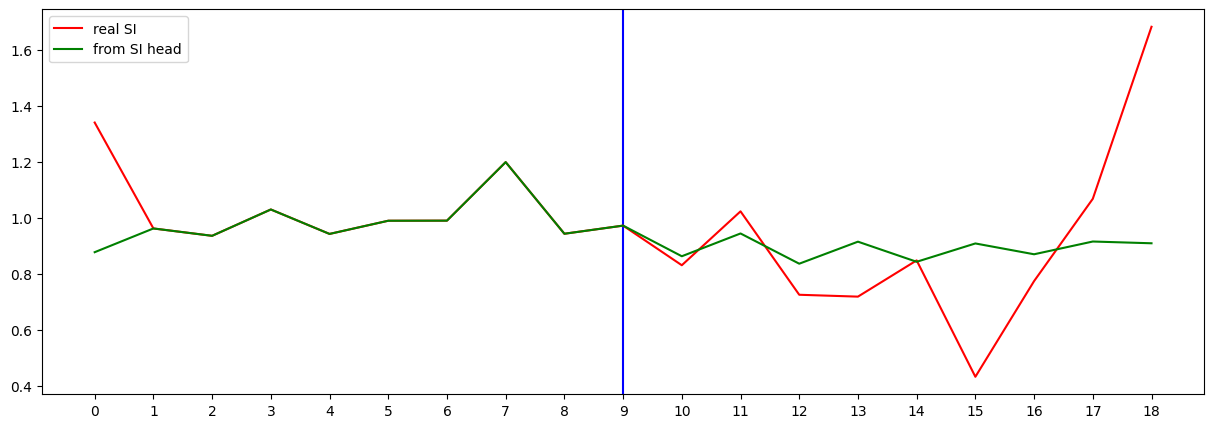

Testing R**2 - (all) - (no inputs):  0.9774578436309114
Testing R**2 - (f2) - SI full (no inputs):  -0.04723753869113212
Testing R**2 - SI head only (no inputs):  0.02577570598915202
0 ...index R**2 (no inputs):  -0.047162220786028275
1 ...index R**2 (no inputs):  0.05386762197729533
2 ...index R**2 (no inputs):  -0.04723753869113212
3 ...index R**2 (no inputs):  0.37170593633710636
4 ...index R**2 (no inputs):  -0.21537781487453667
5 ...index R**2 (no inputs):  -1.2465155002293011
6 ...index R**2 (no inputs):  -0.12121152566789406
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09888236572335107
10 ...index R**2 (no inputs):  -0.3484265103255446
11 ...index R**2 (no inputs):  -37.55973965781946
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.0011374743741430215
16 ...index R**2 (no inputs):  -0.7375080397359985
17 ...index R**2 (no inputs):  -4

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.860961
Loss_SI: 0.7459917664527893 Loss_all: 1.1292215585708618
===
[200] Train Loss: 0.089639
Loss_SI: 0.04527311399579048 Loss_all: 0.19315817952156067
===
[400] Train Loss: 0.034186
Loss_SI: 0.014332739636301994 Loss_all: 0.08050870150327682
===
[600] Train Loss: 0.023819
Loss_SI: 0.013126662001013756 Loss_all: 0.04876724258065224
===
[800] Train Loss: 0.019477
Loss_SI: 0.010063091292977333 Loss_all: 0.04144309088587761
===


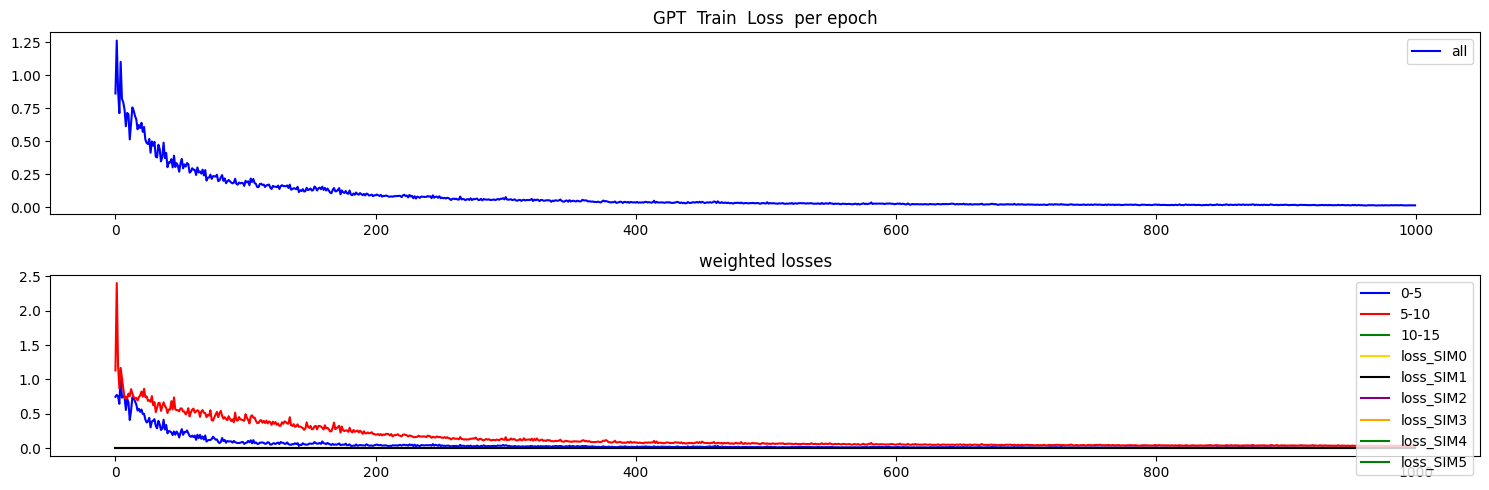

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


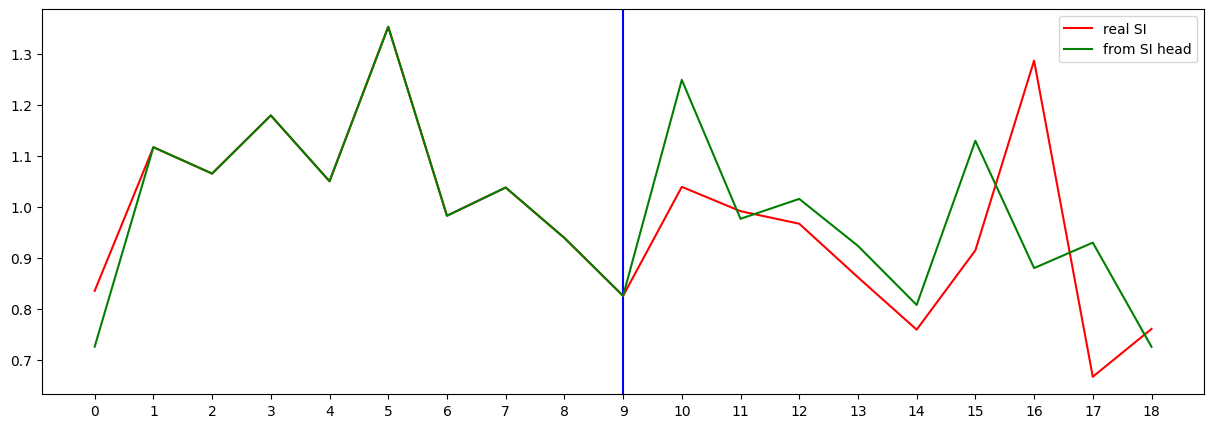

Testing R**2 - (all) - (no inputs):  0.9956393749059819
Testing R**2 - (f2) - SI full (no inputs):  -0.16081379028737408
Testing R**2 - SI head only (no inputs):  0.08533774467125099
0 ...index R**2 (no inputs):  -0.09328946412573802
1 ...index R**2 (no inputs):  -0.41008523452612455
2 ...index R**2 (no inputs):  -0.16081379028737408
3 ...index R**2 (no inputs):  -0.4212478393014234
4 ...index R**2 (no inputs):  -9.630510394157994
5 ...index R**2 (no inputs):  -13.211668058728222
6 ...index R**2 (no inputs):  -6449.670480240409
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.34615509845316406
10 ...index R**2 (no inputs):  -2.499805026826089
11 ...index R**2 (no inputs):  -0.07897292587770699
12 ...index R**2 (no inputs):  -0.2857106254205939
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6155016741373767
16 ...index R**2 (no inputs):  -1.6061238900144539
17 ...index R**2 (no i

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.040011
Loss_SI: 0.9405187368392944 Loss_all: 1.2721590995788574
===
[200] Train Loss: 0.158770
Loss_SI: 0.11025115847587585 Loss_all: 0.27197974920272827
===
[400] Train Loss: 0.143901
Loss_SI: 0.10019870102405548 Loss_all: 0.24587254226207733
===
[600] Train Loss: 0.059731
Loss_SI: 0.032918013632297516 Loss_all: 0.12229425460100174
===
[800] Train Loss: 0.052843
Loss_SI: 0.023466452956199646 Loss_all: 0.12138993293046951
===


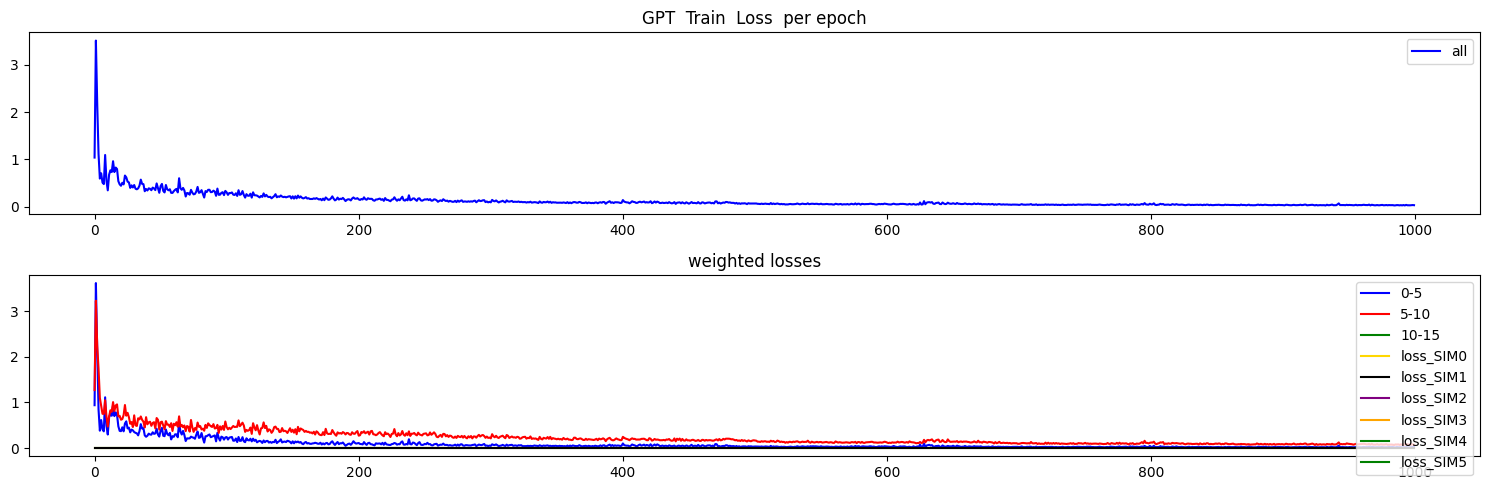

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


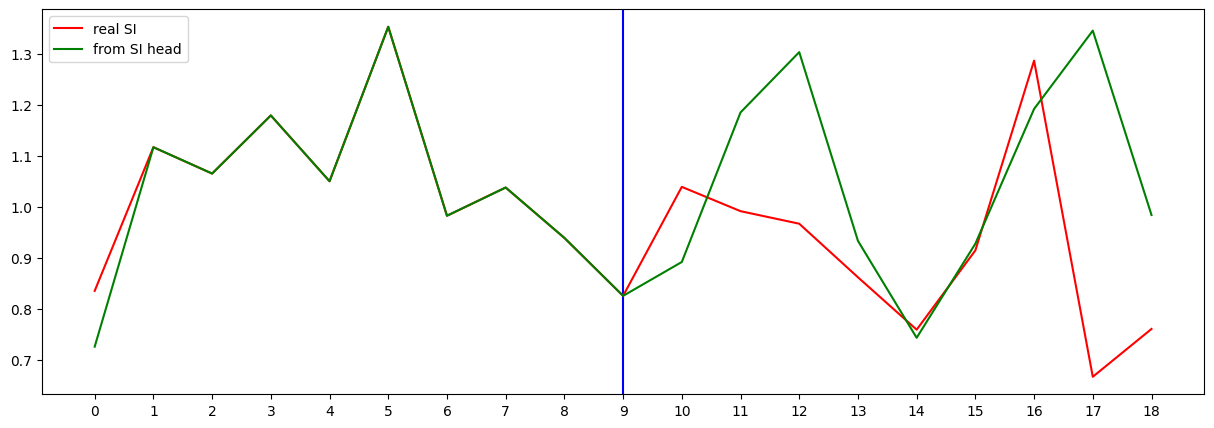

Testing R**2 - (all) - (no inputs):  0.992406545311857
Testing R**2 - (f2) - SI full (no inputs):  -4.425406189558272
Testing R**2 - SI head only (no inputs):  -3.132993280072494
0 ...index R**2 (no inputs):  -1.6207902592157204
1 ...index R**2 (no inputs):  -4.438956684370641
2 ...index R**2 (no inputs):  -4.425406189558272
3 ...index R**2 (no inputs):  -0.6000686098031558
4 ...index R**2 (no inputs):  -1.7461715010821002
5 ...index R**2 (no inputs):  -24.065771583759293
6 ...index R**2 (no inputs):  -80.3811280829545
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.01701757195951359
10 ...index R**2 (no inputs):  -0.055585833230777704
11 ...index R**2 (no inputs):  -0.30050203261577324
12 ...index R**2 (no inputs):  -0.28571553000512284
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9688420488947322
16 ...index R**2 (no inputs):  -3.9949325265860454
17 ...index R**2 (no inputs

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.582255
Loss_SI: 0.4011557102203369 Loss_all: 1.0048210620880127
===
[200] Train Loss: 0.207053
Loss_SI: 0.14651493728160858 Loss_all: 0.3483096957206726
===
[400] Train Loss: 0.181521
Loss_SI: 0.1204891949892044 Loss_all: 0.32392799854278564
===
[600] Train Loss: 0.123491
Loss_SI: 0.07827746868133545 Loss_all: 0.22898925840854645
===
[800] Train Loss: 0.076899
Loss_SI: 0.04535861685872078 Loss_all: 0.1504935920238495
===


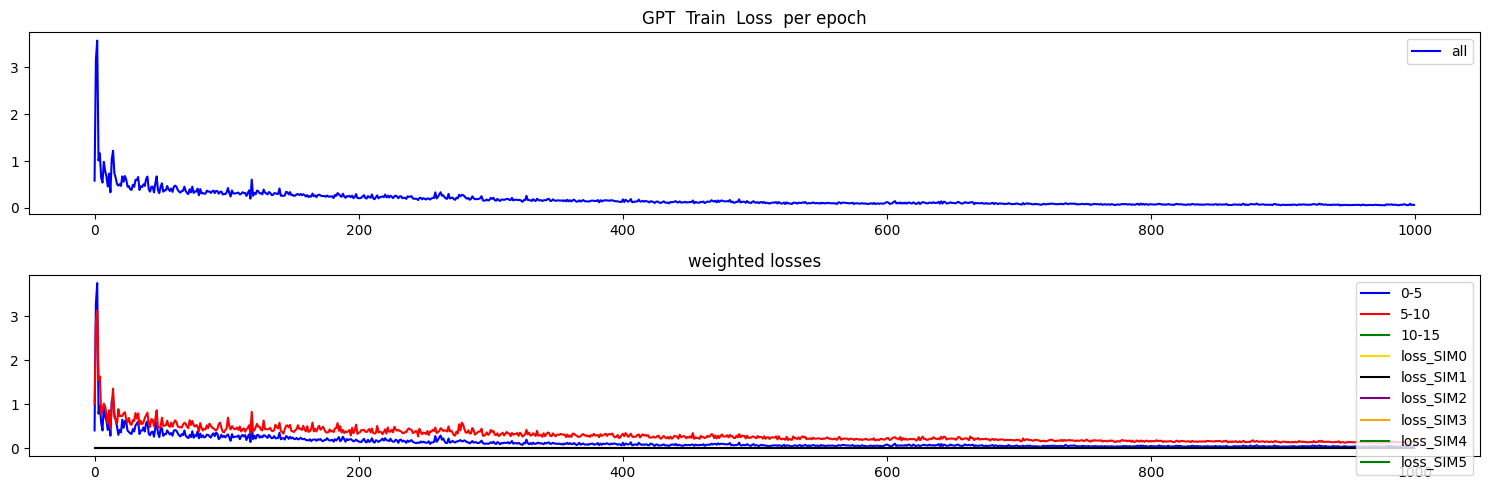

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


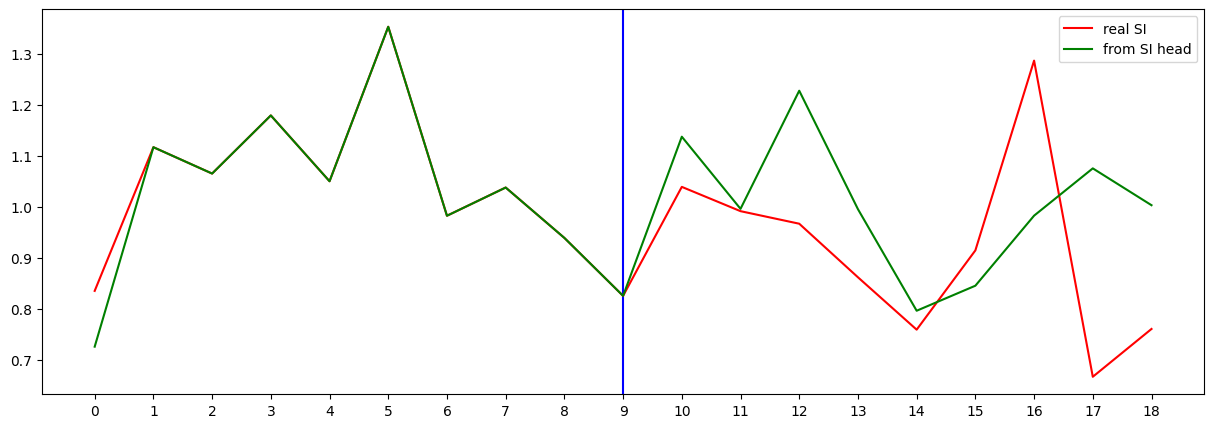

Testing R**2 - (all) - (no inputs):  0.9758659071526796
Testing R**2 - (f2) - SI full (no inputs):  -2.5746853458979655
Testing R**2 - SI head only (no inputs):  -1.4764759739234106
0 ...index R**2 (no inputs):  -1.426241735839822
1 ...index R**2 (no inputs):  -1.7183078981192978
2 ...index R**2 (no inputs):  -2.5746853458979655
3 ...index R**2 (no inputs):  -0.1977088502024953
4 ...index R**2 (no inputs):  -2.217065705468211
5 ...index R**2 (no inputs):  -78.98517250998508
6 ...index R**2 (no inputs):  -1608.7160746535528
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.1630442656925879
10 ...index R**2 (no inputs):  -0.3852940245023502
11 ...index R**2 (no inputs):  -0.0807118957941968
12 ...index R**2 (no inputs):  -0.26544848030670565
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2753925794386434
16 ...index R**2 (no inputs):  -1.599685285795784
17 ...index R**2 (no inputs):

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.722431
Loss_SI: 0.5736930966377258 Loss_all: 1.0694870948791504
===
[200] Train Loss: 0.228624
Loss_SI: 0.13269922137260437 Loss_all: 0.45244741439819336
===
[400] Train Loss: 0.159422
Loss_SI: 0.08590133488178253 Loss_all: 0.33097073435783386
===
[600] Train Loss: 0.175801
Loss_SI: 0.09047457575798035 Loss_all: 0.374896377325058
===
[800] Train Loss: 0.104225
Loss_SI: 0.055763863027095795 Loss_all: 0.21730054914951324
===


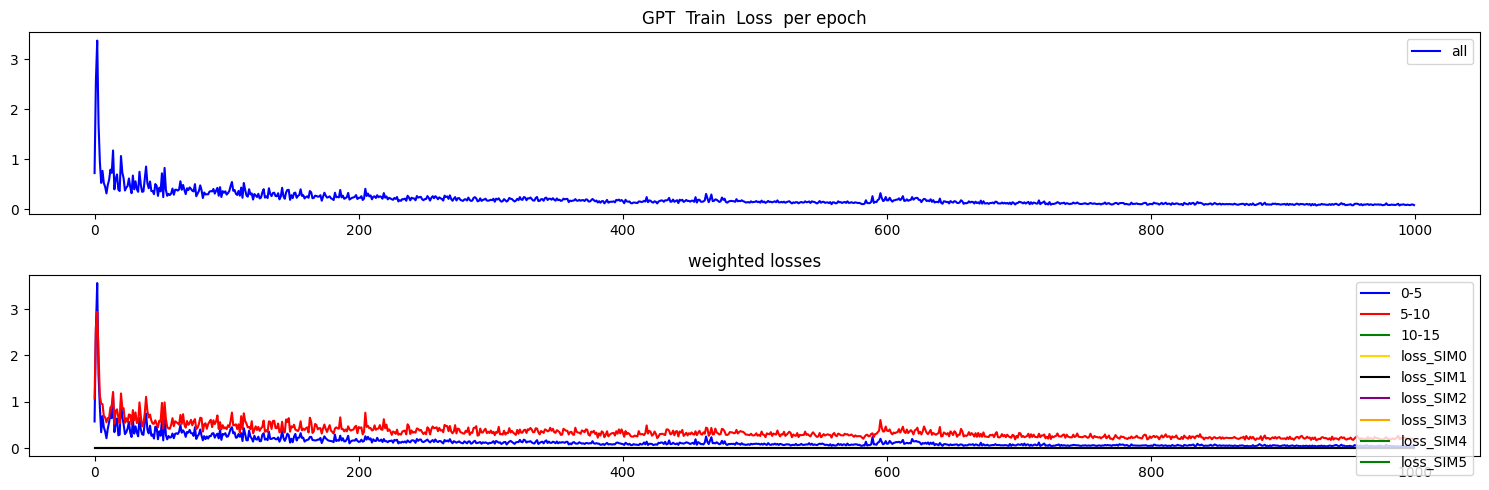

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


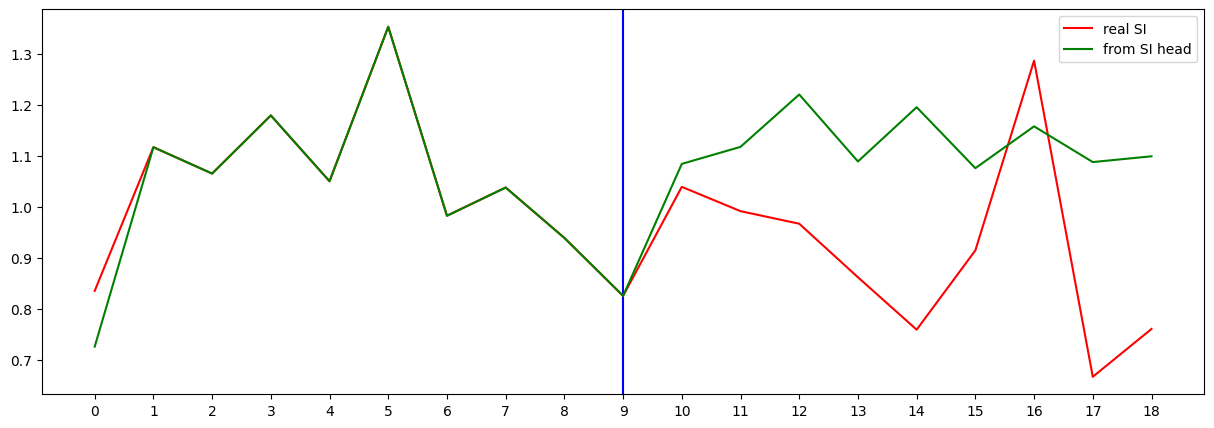

Testing R**2 - (all) - (no inputs):  0.9914951421396357
Testing R**2 - (f2) - SI full (no inputs):  -3.839739453934791
Testing R**2 - SI head only (no inputs):  -2.0955220208619427
0 ...index R**2 (no inputs):  -0.584319193079696
1 ...index R**2 (no inputs):  -2.154771324185364
2 ...index R**2 (no inputs):  -3.839739453934791
3 ...index R**2 (no inputs):  -3.5277660046944375
4 ...index R**2 (no inputs):  -40.90487900071138
5 ...index R**2 (no inputs):  -26.810743437130654
6 ...index R**2 (no inputs):  -237.23691706771018
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.09926734119653702
10 ...index R**2 (no inputs):  -0.14373442092678923
11 ...index R**2 (no inputs):  -0.4532999921973826
12 ...index R**2 (no inputs):  -0.3494541898395198
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.050343963539946746
16 ...index R**2 (no inputs):  -0.2541021869538713
17 ...index R**2 (no inputs

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.692194
Loss_SI: 0.4761924743652344 Loss_all: 1.1961970329284668
===
[200] Train Loss: 0.108863
Loss_SI: 0.054169028997421265 Loss_all: 0.23648284375667572
===
[400] Train Loss: 0.040427
Loss_SI: 0.017846891656517982 Loss_all: 0.0931134968996048
===
[600] Train Loss: 0.031688
Loss_SI: 0.01736796647310257 Loss_all: 0.06510086357593536
===
[800] Train Loss: 0.026931
Loss_SI: 0.014044573530554771 Loss_all: 0.05699795112013817
===


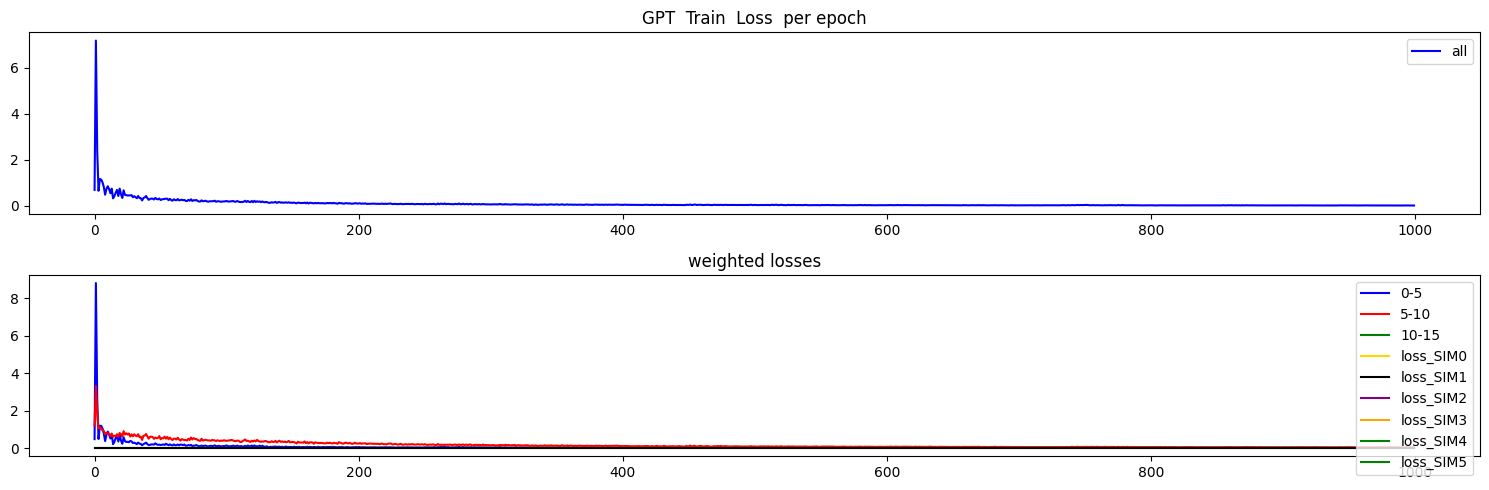

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


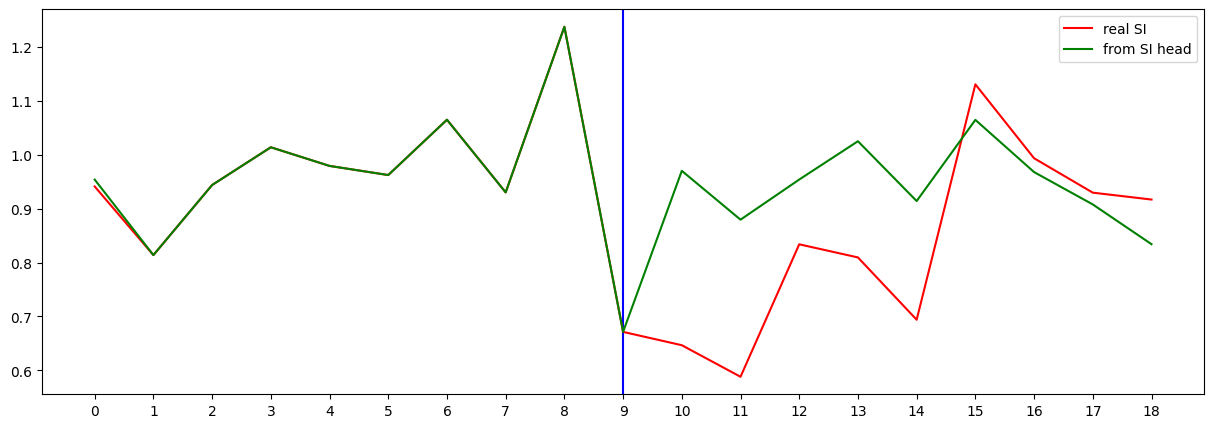

Testing R**2 - (all) - (no inputs):  0.8652825907132897
Testing R**2 - (f2) - SI full (no inputs):  -0.7778829068659838
Testing R**2 - SI head only (no inputs):  -0.6404039798344339
0 ...index R**2 (no inputs):  -1.2077406605763907
1 ...index R**2 (no inputs):  -2.603270273374921
2 ...index R**2 (no inputs):  -0.7778829068659838
3 ...index R**2 (no inputs):  -7.882769474182565
4 ...index R**2 (no inputs):  -7.222606346480562
5 ...index R**2 (no inputs):  -6.3872231418231085
6 ...index R**2 (no inputs):  -0.07648121482390557
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.468001086278249
10 ...index R**2 (no inputs):  -0.1074337982979241
11 ...index R**2 (no inputs):  -0.7016420420259237
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4999518405924865
16 ...index R**2 (no inputs):  -2.290373362291165
17 ...index R**2 (no inputs):  -29.7515838411

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.741789
Loss_SI: 0.5503740906715393 Loss_all: 1.1884241104125977
===
[200] Train Loss: 0.168168
Loss_SI: 0.07805053889751434 Loss_all: 0.3784424662590027
===
[400] Train Loss: 0.114444
Loss_SI: 0.054226115345954895 Loss_all: 0.25495144724845886
===
[600] Train Loss: 0.087545
Loss_SI: 0.04303749278187752 Loss_all: 0.19139684736728668
===
[800] Train Loss: 0.048862
Loss_SI: 0.021313467994332314 Loss_all: 0.11314291507005692
===


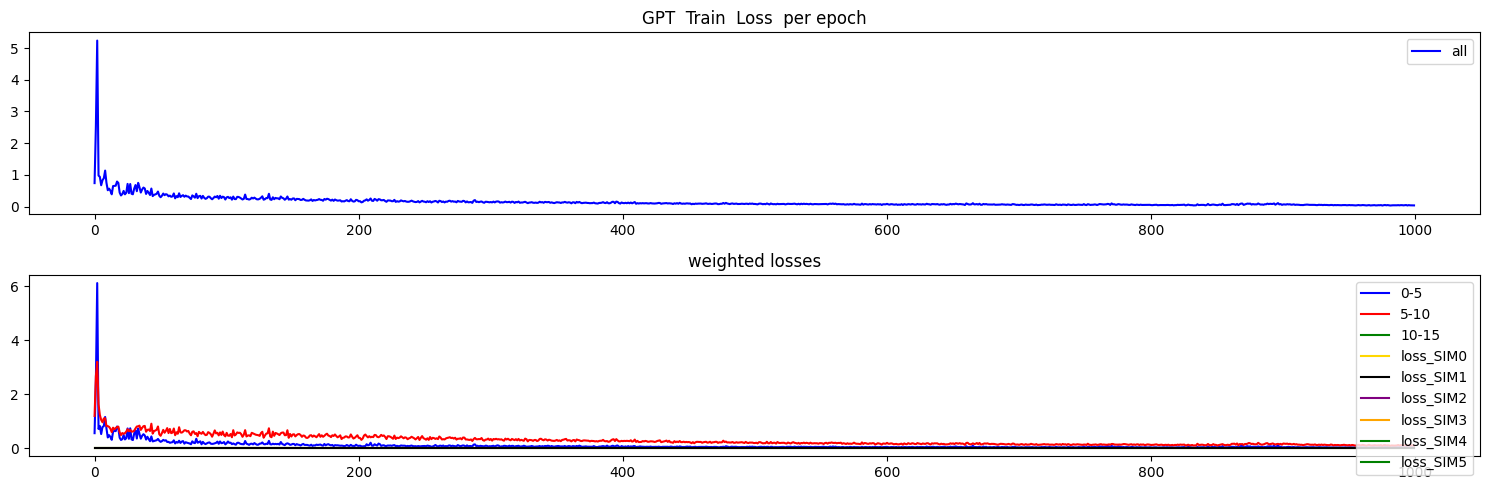

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


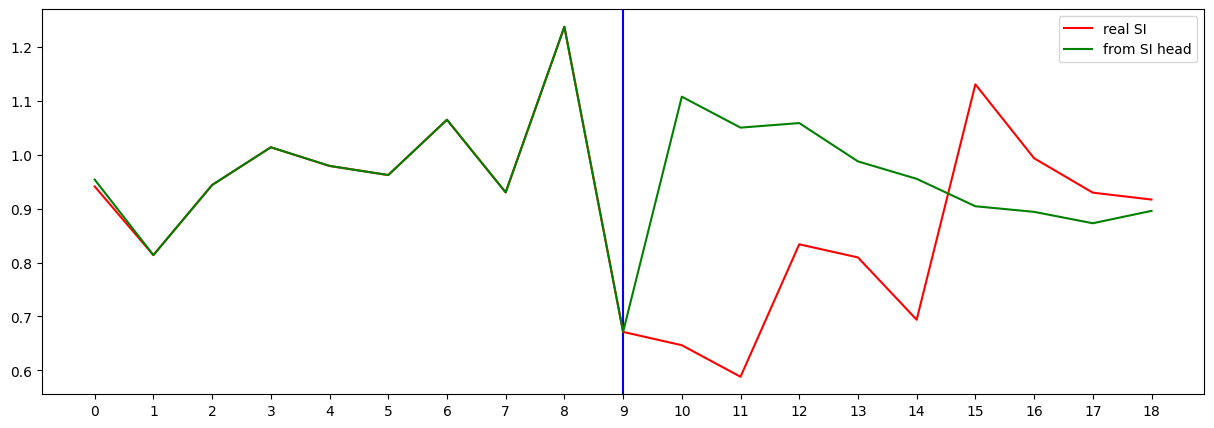

Testing R**2 - (all) - (no inputs):  0.8869666421502176
Testing R**2 - (f2) - SI full (no inputs):  -1.431391860495257
Testing R**2 - SI head only (no inputs):  -1.4313778745826191
0 ...index R**2 (no inputs):  -0.5989579613503249
1 ...index R**2 (no inputs):  -2.556097182455868
2 ...index R**2 (no inputs):  -1.431391860495257
3 ...index R**2 (no inputs):  -7.645273039693812
4 ...index R**2 (no inputs):  -7.1871161521756015
5 ...index R**2 (no inputs):  -5.191548271167601
6 ...index R**2 (no inputs):  -0.43861977921555617
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.37805678003983534
10 ...index R**2 (no inputs):  -0.6133757054024433
11 ...index R**2 (no inputs):  0.050299766939133406
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.281449283430205
16 ...index R**2 (no inputs):  -0.8313503966159401
17 ...index R**2 (no inputs):  -51.474640316

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.840665
Loss_SI: 0.5823321342468262 Loss_all: 1.4434422254562378
===
[200] Train Loss: 0.175110
Loss_SI: 0.11702652275562286 Loss_all: 0.31063881516456604
===
[400] Train Loss: 0.168491
Loss_SI: 0.09702526777982712 Loss_all: 0.3352455198764801
===
[600] Train Loss: 0.097586
Loss_SI: 0.04686889052391052 Loss_all: 0.21592505276203156
===
[800] Train Loss: 0.072505
Loss_SI: 0.034879785031080246 Loss_all: 0.16029715538024902
===


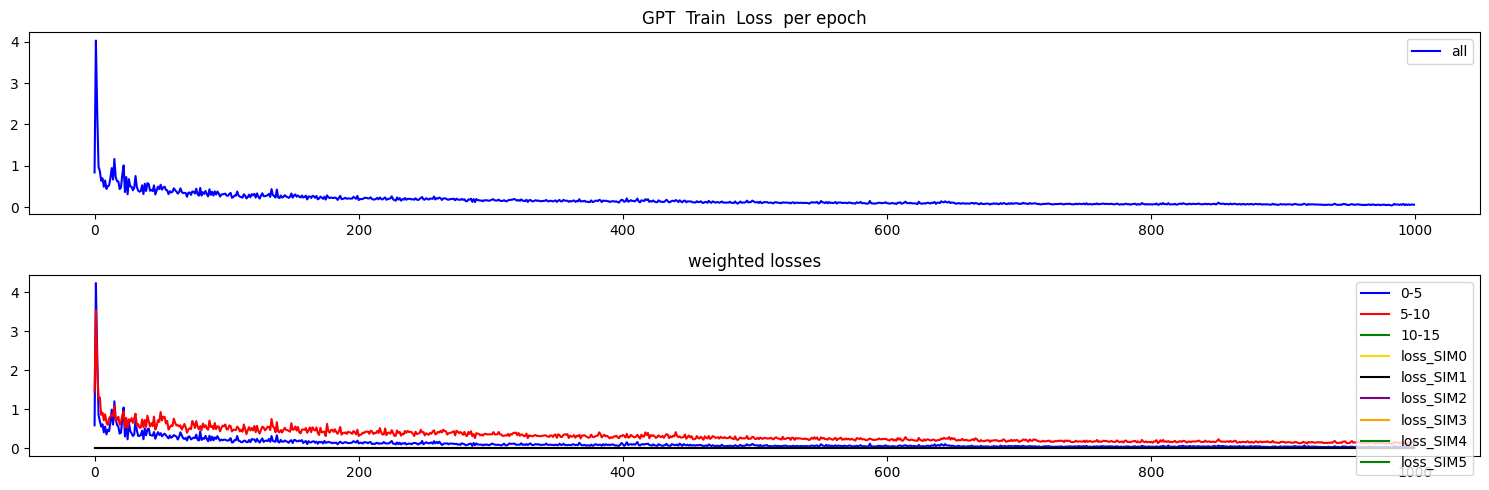

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


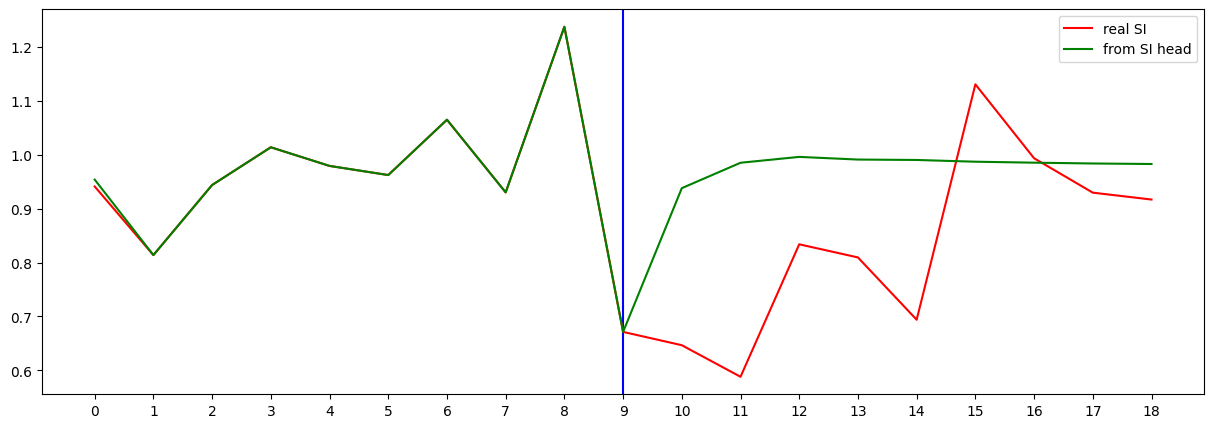

Testing R**2 - (all) - (no inputs):  0.841912106167019
Testing R**2 - (f2) - SI full (no inputs):  -0.2964730872157282
Testing R**2 - SI head only (no inputs):  -0.42037021093117066
0 ...index R**2 (no inputs):  -0.10179570056606901
1 ...index R**2 (no inputs):  -0.45282434895200874
2 ...index R**2 (no inputs):  -0.2964730872157282
3 ...index R**2 (no inputs):  -7.989869522266442
4 ...index R**2 (no inputs):  -6.852849483351509
5 ...index R**2 (no inputs):  -7.666590411796909
6 ...index R**2 (no inputs):  -0.003125443563143371
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05484215569474715
10 ...index R**2 (no inputs):  -0.038200089466142506
11 ...index R**2 (no inputs):  -1.3998748923186213
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.9936104400536308
16 ...index R**2 (no inputs):  -0.1499201080626209
17 ...index R**2 (no inputs):  -89.80

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.605026
Loss_SI: 0.46545326709747314 Loss_all: 0.9306962490081787
===
[200] Train Loss: 0.248471
Loss_SI: 0.1576356589794159 Loss_all: 0.46041983366012573
===
[400] Train Loss: 0.154078
Loss_SI: 0.08736874163150787 Loss_all: 0.3097320795059204
===
[600] Train Loss: 0.142620
Loss_SI: 0.07243082672357559 Loss_all: 0.30639442801475525
===
[800] Train Loss: 0.128323
Loss_SI: 0.08215855062007904 Loss_all: 0.23604042828083038
===


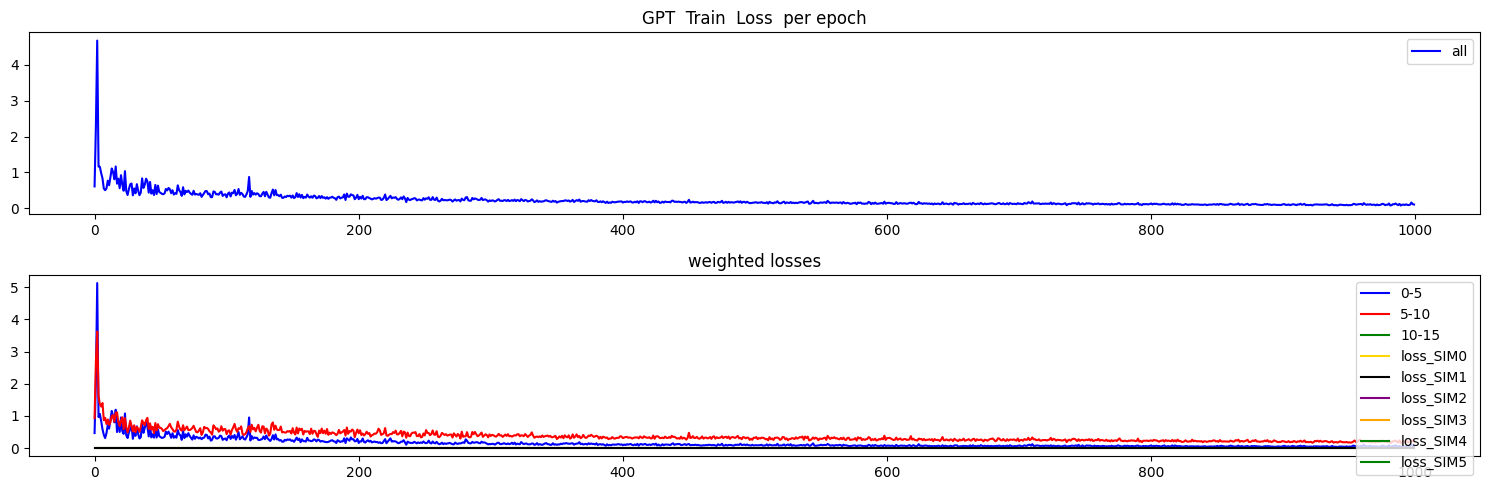

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


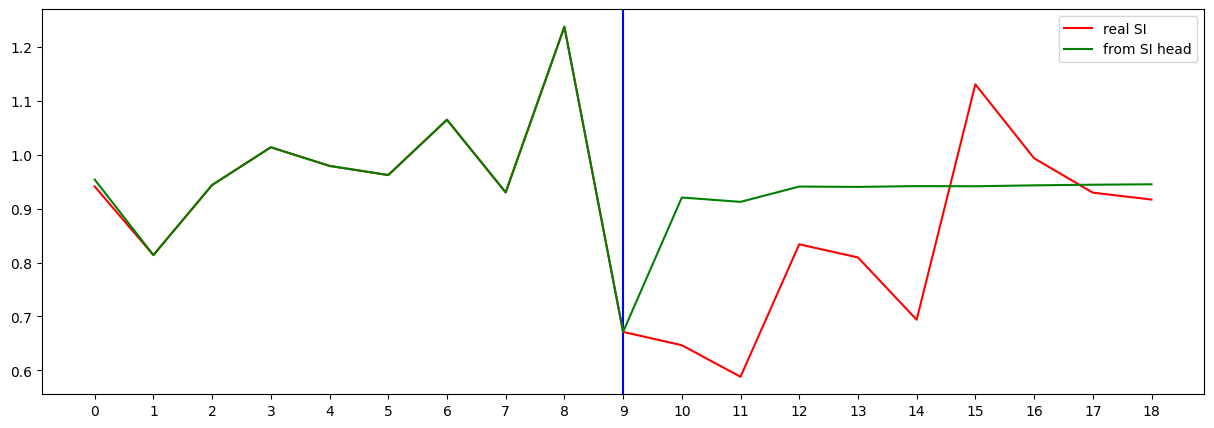

Testing R**2 - (all) - (no inputs):  0.8889567050441055
Testing R**2 - (f2) - SI full (no inputs):  0.07603235464155178
Testing R**2 - SI head only (no inputs):  -0.1178442689652901
0 ...index R**2 (no inputs):  -0.20306799474530446
1 ...index R**2 (no inputs):  -0.038465640637036946
2 ...index R**2 (no inputs):  0.07603235464155178
3 ...index R**2 (no inputs):  -6.386568549762739
4 ...index R**2 (no inputs):  -6.871498694032165
5 ...index R**2 (no inputs):  -5.079955364394039
6 ...index R**2 (no inputs):  -0.018478689404888726
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.10472995056201229
10 ...index R**2 (no inputs):  0.009188666456402261
11 ...index R**2 (no inputs):  -0.5931196573656052
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9998105234598416
16 ...index R**2 (no inputs):  -0.2815640516436313
17 ...index R**2 (no inputs):  -12.21

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.827131
Loss_SI: 0.6623321175575256 Loss_all: 1.2116631269454956
===
[200] Train Loss: 0.108981
Loss_SI: 0.07034662365913391 Loss_all: 0.1991279572248459
===
[400] Train Loss: 0.041426
Loss_SI: 0.023105287924408913 Loss_all: 0.08417582511901855
===
[600] Train Loss: 0.022159
Loss_SI: 0.010009745135903358 Loss_all: 0.050508368760347366
===
[800] Train Loss: 0.020111
Loss_SI: 0.009593821130692959 Loss_all: 0.0446496456861496
===


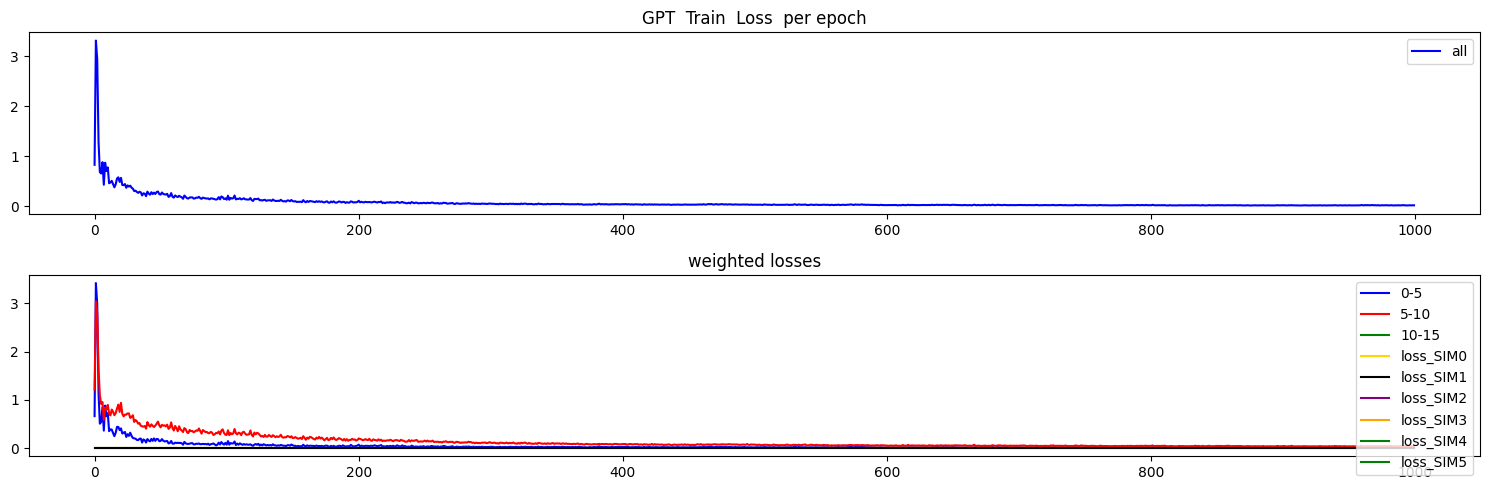

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


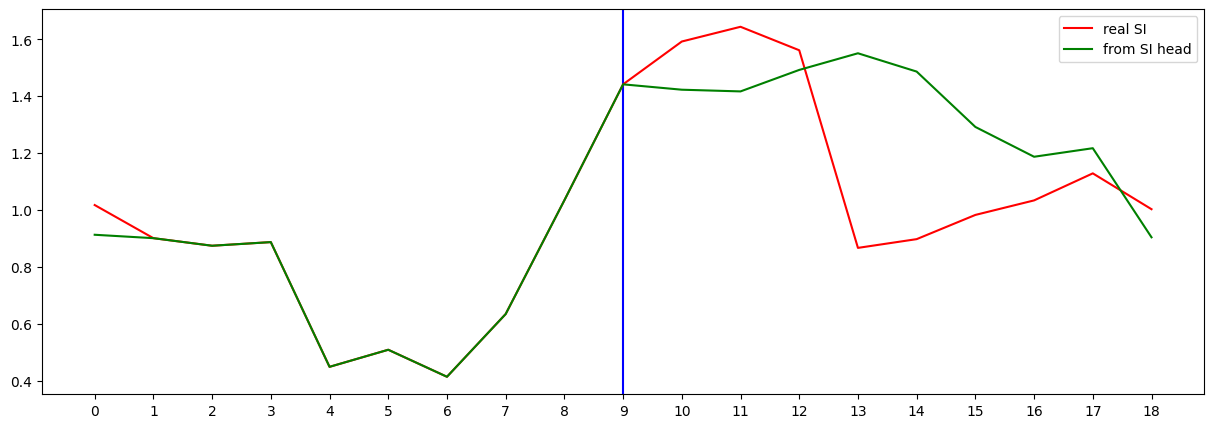

Testing R**2 - (all) - (no inputs):  0.25591070573987107
Testing R**2 - (f2) - SI full (no inputs):  -1.5512180567475329
Testing R**2 - SI head only (no inputs):  -1.0063968317692336
0 ...index R**2 (no inputs):  -1.164200836643317
1 ...index R**2 (no inputs):  -0.022233925900820184
2 ...index R**2 (no inputs):  -1.5512180567475329
3 ...index R**2 (no inputs):  -3.549937227975417
4 ...index R**2 (no inputs):  -1.1866809034791803
5 ...index R**2 (no inputs):  -2.4557356107486883
6 ...index R**2 (no inputs):  -6996.391934103821
7 ...index R**2 (no inputs):  -2.3730201954476375
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.0063510452221633
10 ...index R**2 (no inputs):  -0.5700573783218357
11 ...index R**2 (no inputs):  -44.96926101996394
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -17.01895746048384
16 ...index R**2 (no inputs):  -0.17408765691808736
17 ...index R**2 (no input

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.888897
Loss_SI: 0.7019514441490173 Loss_all: 1.3251036405563354
===
[200] Train Loss: 0.203990
Loss_SI: 0.13245230913162231 Loss_all: 0.3709103465080261
===
[400] Train Loss: 0.093262
Loss_SI: 0.04902656748890877 Loss_all: 0.19647730886936188
===
[600] Train Loss: 0.056133
Loss_SI: 0.027266232296824455 Loss_all: 0.12348846346139908
===
[800] Train Loss: 0.046129
Loss_SI: 0.02063678950071335 Loss_all: 0.10561224818229675
===


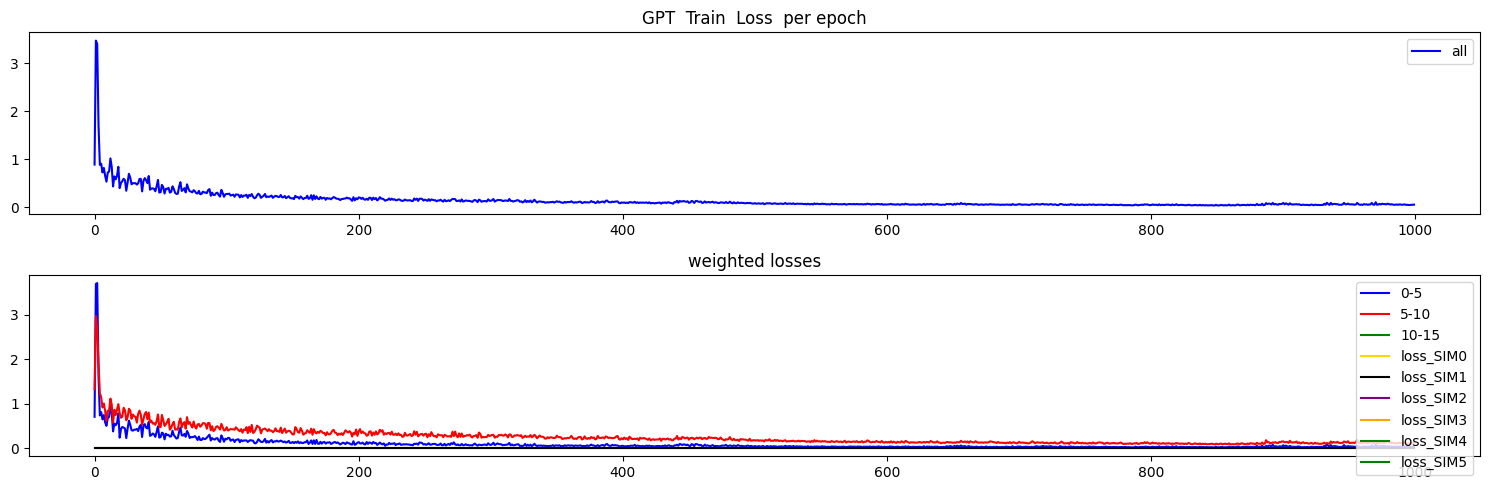

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


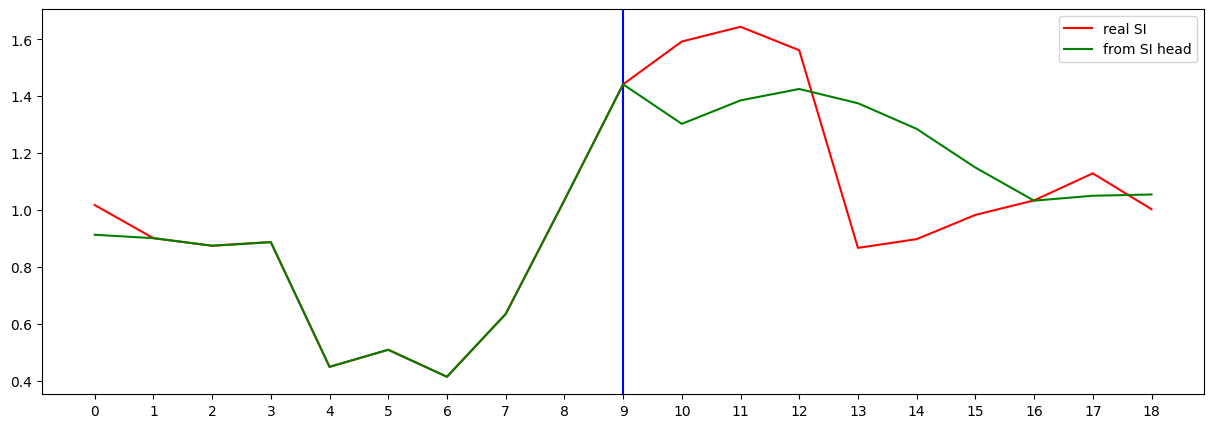

Testing R**2 - (all) - (no inputs):  0.6177705701293603
Testing R**2 - (f2) - SI full (no inputs):  -0.6821665127075371
Testing R**2 - SI head only (no inputs):  -0.2714275755647808
0 ...index R**2 (no inputs):  -0.7423679689142901
1 ...index R**2 (no inputs):  -0.013285313193426518
2 ...index R**2 (no inputs):  -0.6821665127075371
3 ...index R**2 (no inputs):  -2.321416285313783
4 ...index R**2 (no inputs):  -0.9460260907693323
5 ...index R**2 (no inputs):  -0.7745347540176519
6 ...index R**2 (no inputs):  -4886.860924742248
7 ...index R**2 (no inputs):  -0.2527261179488438
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3764691483568896
10 ...index R**2 (no inputs):  -0.340862958157643
11 ...index R**2 (no inputs):  -202.21795766380367
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.406215379627888
16 ...index R**2 (no inputs):  -0.737162738327434
17 ...index R**2 (no inputs)

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.834272
Loss_SI: 0.6694589853286743 Loss_all: 1.2188360691070557
===
[200] Train Loss: 0.242420
Loss_SI: 0.1402699202299118 Loss_all: 0.4807712137699127
===
[400] Train Loss: 0.167778
Loss_SI: 0.097154900431633 Loss_all: 0.33256688714027405
===
[600] Train Loss: 0.143266
Loss_SI: 0.09912779927253723 Loss_all: 0.2462540566921234
===
[800] Train Loss: 0.079216
Loss_SI: 0.0397745780646801 Loss_all: 0.17124700546264648
===


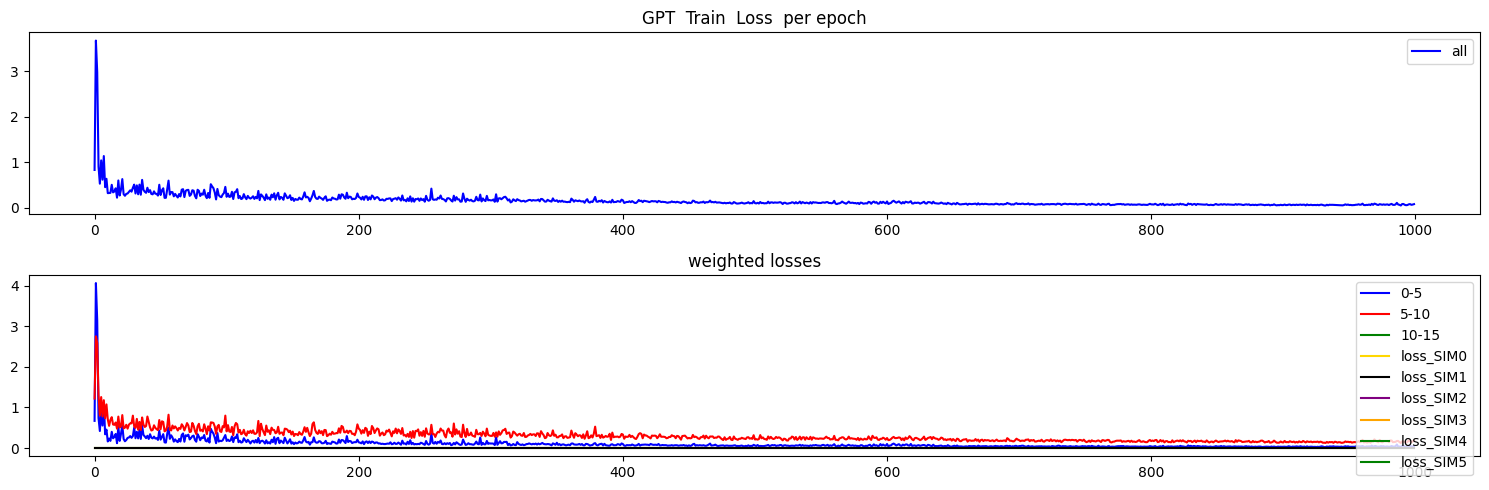

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


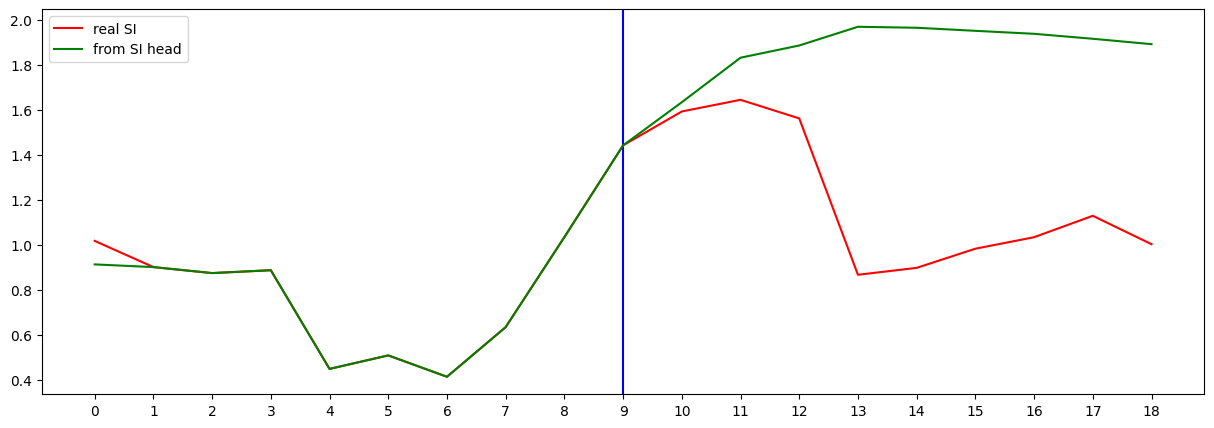

Testing R**2 - (all) - (no inputs):  0.31973264484971486
Testing R**2 - (f2) - SI full (no inputs):  -10.070823048047961
Testing R**2 - SI head only (no inputs):  -8.963017976376154
0 ...index R**2 (no inputs):  -0.21296680748590902
1 ...index R**2 (no inputs):  -7.693872442396557
2 ...index R**2 (no inputs):  -10.070823048047961
3 ...index R**2 (no inputs):  -1.2888200568466641
4 ...index R**2 (no inputs):  -2.014786634219701
5 ...index R**2 (no inputs):  -2.1291937029127284
6 ...index R**2 (no inputs):  -75738.84140643146
7 ...index R**2 (no inputs):  -0.23686206786881603
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.642824507078193
10 ...index R**2 (no inputs):  -1.1033244796308108
11 ...index R**2 (no inputs):  -107.46526593663195
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.511964540700397
16 ...index R**2 (no inputs):  -2.9165483386625666
17 ...index R**2 (no inputs)

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.789011
Loss_SI: 0.566921055316925 Loss_all: 1.3072223663330078
===
[200] Train Loss: 0.236888
Loss_SI: 0.18728022277355194 Loss_all: 0.35263851284980774
===
[400] Train Loss: 0.183392
Loss_SI: 0.14211004972457886 Loss_all: 0.27971503138542175
===
[600] Train Loss: 0.178008
Loss_SI: 0.13172945380210876 Loss_all: 0.285991370677948
===
[800] Train Loss: 0.088333
Loss_SI: 0.05347846448421478 Loss_all: 0.1696607917547226
===


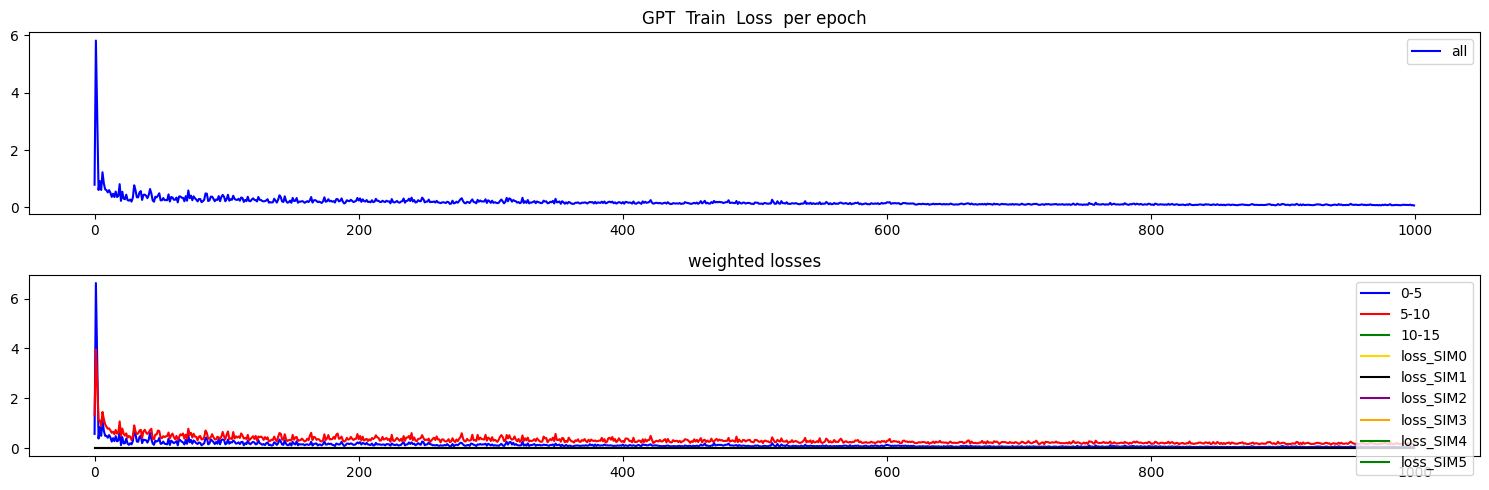

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


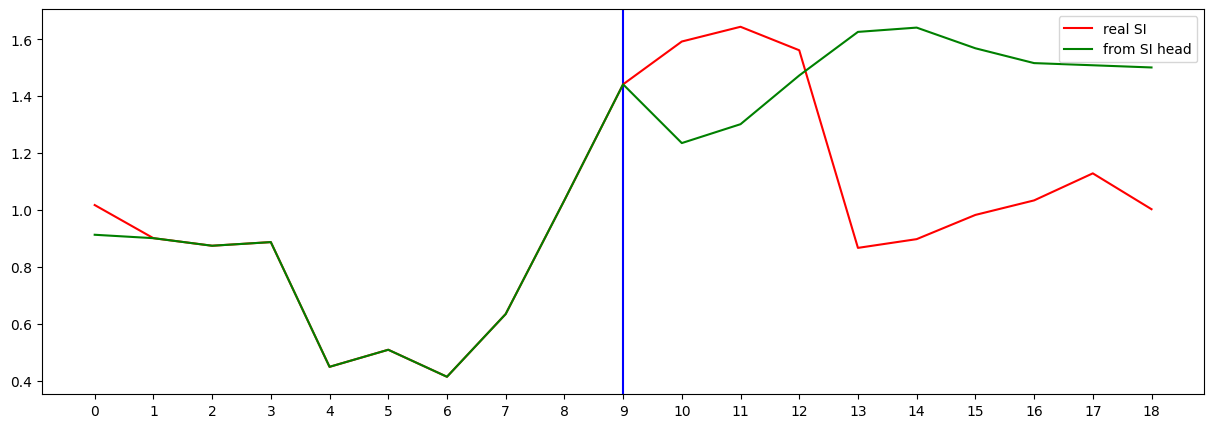

Testing R**2 - (all) - (no inputs):  0.09810292029948042
Testing R**2 - (f2) - SI full (no inputs):  -4.098350293329949
Testing R**2 - SI head only (no inputs):  -2.9344256100266217
0 ...index R**2 (no inputs):  0.017232012470432156
1 ...index R**2 (no inputs):  -0.42248818858537684
2 ...index R**2 (no inputs):  -4.098350293329949
3 ...index R**2 (no inputs):  -4.753547182015396
4 ...index R**2 (no inputs):  -3.550302716570638
5 ...index R**2 (no inputs):  -3.182985475720349
6 ...index R**2 (no inputs):  -35664.32709353133
7 ...index R**2 (no inputs):  -0.8586739156696508
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.903848606675471
10 ...index R**2 (no inputs):  -0.16002040102382398
11 ...index R**2 (no inputs):  -26.22832671148072
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.34209221965935
16 ...index R**2 (no inputs):  -0.6434763270882897
17 ...index R**2 (no inputs):  

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.22183351830172304


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.3546289123431914


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -1.90371249545252


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.7488586400176722



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: 0.5030321851331281
2 .....R² on first n steps: 0.6333115209887976
3 .....R² on first n steps: 0.21953163954385746
4 .....R² on first n steps: -0.14164160169110174
5 .....R² on first n steps: -0.29111945109431026
6 .....R² on first n steps: -0.30215562144720076
7 .....R² on first n steps: -0.2792156010160627
8 .....R² on first n steps: -0.23110735175243624
9 .....R² on first n steps: -0.22183351830172304


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: 0.2725901949377122
2 .....R² on first n steps: 0.4073858230481632
3 .....R² on first n steps: -0.04088872589057235
4 .....R² on first n steps: -0.2186227385110664
5 .....R² on first n steps: -0.3657552632080219
6 .....R² on first n steps: -0.3981752734523345
7 .....R² on first n steps: -0.501259673026706
8 .....R² on first n steps: -0.4244969096724074
9 .....R² on first n steps: -0.3546289123431914


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: 0.7112845001198965
2 .....R² on first n steps: 0.6948024095728702
3 .....R² on first n steps: -0.286787673524838
4 .....R² on first n steps: -1.1137402148265756
5 .....R² on first n steps: -1.4196136154165582
6 .....R² on first n steps: -1.8583835939278717
7 .....R² on first n steps: -2.062613237958791
8 .....R² on first n steps: -1.7750003478075502
9 .....R² on first n steps: -1.90371249545252


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: 0.43672407039370353
2 .....R² on first n steps: 0.5099186225966555
3 .....R² on first n steps: 0.14385051085923606
4 .....R² on first n steps: -0.29077418117565146
5 .....R² on first n steps: -0.4573644169714606
6 .....R² on first n steps: -0.5411225209980688
7 .....R² on first n steps: -0.6473508500893168
8 .....R² on first n steps: -0.6647867886706873
9 .....R² on first n steps: -0.7488586400176722



## Plot


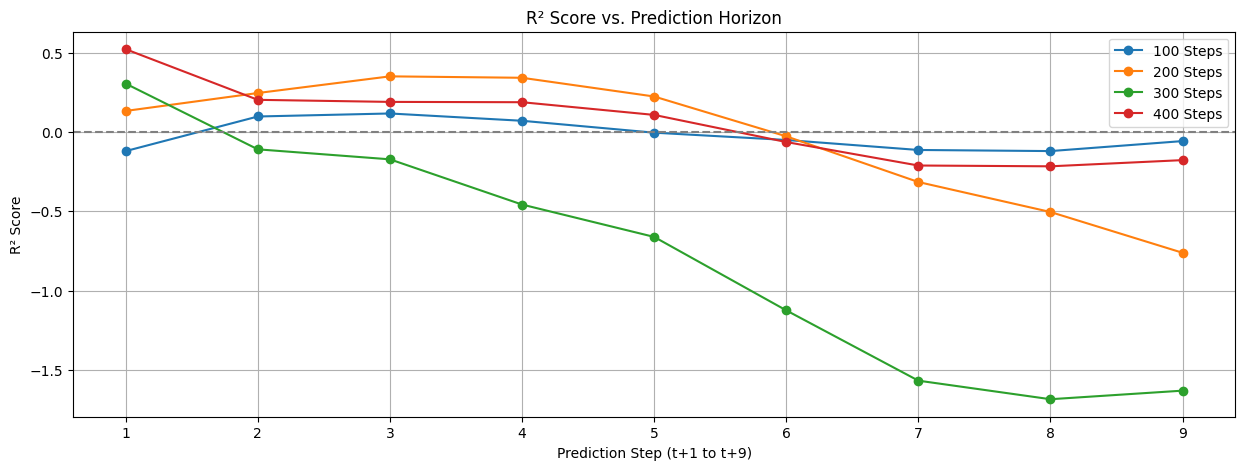

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
